<a href="https://colab.research.google.com/github/AgentRia/Loan-Default-Prediction.AML/blob/main/Loandata2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Machine Learning Algorithms for predicting default in loan repayment.**

PREPARE IDE TO LOAD DATASETS FROM THE GOOGLE DRIVE. 
The loan data is saved as loans2.csv and it is in a drive named "Olanozun".

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/My Drive/Olanozun/

Mounted at /content/drive
/content/drive/My Drive/Olanozun


Import modules from scikit Learn. 

-Pandas
-Numpy
-Seaborn
-Matplotlib
-Scikit Learn

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.utils import resample
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, r2_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from pandas.core.ops.array_ops import ensure_wrapped_if_datetimelike
# from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.max_open_warning': 0}) # Hide warnings
%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
# get loans datasets
loan_df = pd.read_csv('newloan.csv')

In [ ]:
# view data
loan_df.head(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [ ]:
# data shape
print(loan_df.shape)

(10000, 55)


In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [ ]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
emp_length,9183.0,5.930306,3.703734,0.00,2.0000,6.000,10.0000,1.000000e+01
annual_income,10000.0,79222.148412,64734.290492,0.00,45000.0000,65000.000,95000.0000,2.300000e+06
debt_to_income,9976.0,19.308192,15.004851,0.00,11.0575,17.570,25.0025,4.690900e+02
annual_income_joint,1495.0,127914.571244,70168.375404,19200.00,86833.5000,113000.000,151545.5000,1.100000e+06
debt_to_income_joint,1495.0,19.979304,8.054781,0.32,14.1600,19.720,25.5000,3.998000e+01
delinq_2y,10000.0,0.216000,0.683660,0.00,0.0000,0.000,0.0000,1.300000e+01
months_since_last_delinq,4342.0,36.760709,21.634939,1.00,19.0000,34.000,53.0000,1.180000e+02
earliest_credit_line,10000.0,2001.290000,7.795510,1963.00,1997.0000,2003.000,2006.0000,2.015000e+03
inquiries_last_12m,10000.0,1.958200,2.380130,0.00,0.0000,1.000,3.0000,2.900000e+01
total_credit_lines,10000.0,22.679600,11.885439,2.00,14.0000,21.000,29.0000,8.700000e+01


In [ ]:
# add column for feature description and print

DATA CLEANING
Aim: To identify columns feature instances with missing values, handle duplicates if any and extract irrelevant variables.

In [ ]:
# identify feature name convention
loan_df.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [ ]:
# extract irrelevant variables: to keep only customers who failed to pay on their due date
loan_df['loan_status'].unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Charged Off', 'Late (16-30 days)'], dtype=object)

Show value counts for the loan attributes, to determine which values are necessary for the prediction.

<Axes: xlabel='loan_status', ylabel='count'>

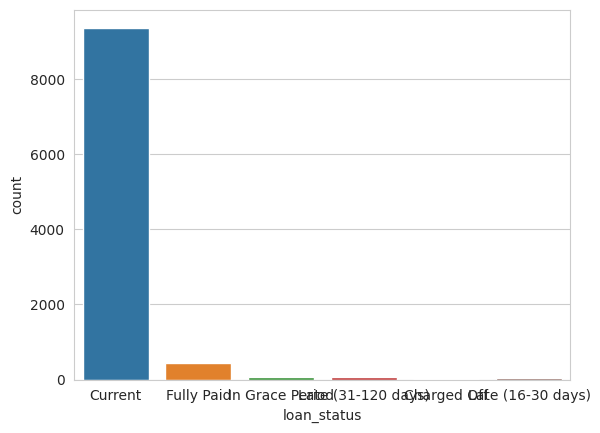

In [ ]:
sns.countplot(data = loan_df, x= 'loan_status', label = 'count')

Create a new loan status, excluding instances where the value is "current"

In [ ]:
new_status = ['Fully Paid', 'In Grace Period', 'Late (32-120 days)', 'Charged Off', 'Late (16-30 days)']
loan_df_2 = loan_df[loan_df['loan_status'].isin(new_status)]

# inspecting target variable

# new_status = ['Fully Paid', 'Charged Off']

# df= df[df['loan_status'].isin(new_status)]

print(loan_df_2.shape)
loan_df_2['loan_status'].unique()

# Add visualization here to show the count of all attributes before dropping row values = current 

(559, 55)


array(['Fully Paid', 'In Grace Period', 'Charged Off',
       'Late (16-30 days)'], dtype=object)

In [ ]:
# count of missing values
loan_df.isnull().sum() 

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

<Axes: xlabel='loan_status', ylabel='count'>

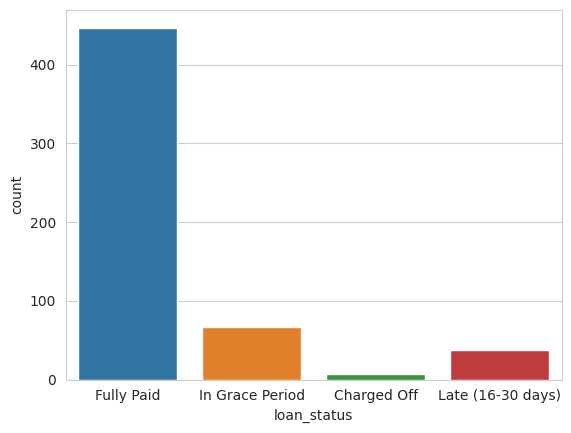

In [ ]:
sns.countplot(data = loan_df_2, x= 'loan_status', label = 'count')

In [ ]:
print(loan_df_2.shape)
loan_df_2.head(5)

(559, 55)


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
18,operational risk manager,10.0,IL,MORTGAGE,210000.0,Verified,9.53,NaN,NaN,NaN,...,E5,Feb-2018,Fully Paid,fractional,Cash,0.00,5202.642672,5000.00,202.64,0.0
19,welder,1.0,CA,MORTGAGE,83000.0,Source Verified,18.44,NaN,NaN,NaN,...,C4,Jan-2018,Fully Paid,whole,Cash,0.00,20653.717722,20000.00,653.72,0.0
34,deputy,10.0,CA,MORTGAGE,140000.0,Not Verified,13.82,NaN,NaN,NaN,...,B2,Jan-2018,Fully Paid,whole,Cash,0.00,15005.166875,15000.00,5.17,0.0
35,armed protection officer,1.0,MD,OWN,70000.0,Source Verified,0.00,NaN,NaN,NaN,...,A2,Jan-2018,Fully Paid,whole,Cash,0.00,2409.049993,2400.00,9.05,0.0
37,supplies clerk,10.0,NJ,MORTGAGE,70000.0,Verified,17.06,105000.0,Verified,13.27,...,C4,Mar-2018,In Grace Period,whole,Cash,23455.27,1102.830000,544.73,558.10,0.0


Fill in missing data for integer attributes, using the mean strategy.

In [ ]:
# view count of missing data
loan_df_2.isnull().sum()

emp_title                            36
emp_length                           34
state                                 0
homeownership                         0
annual_income                         0
verified_income                       0
debt_to_income                        3
annual_income_joint                 475
verification_income_joint           478
debt_to_income_joint                475
delinq_2y                             0
months_since_last_delinq            307
earliest_credit_line                  0
inquiries_last_12m                    0
total_credit_lines                    0
open_credit_lines                     0
total_credit_limit                    0
total_credit_utilized                 0
num_collections_last_12m              0
num_historical_failed_to_pay          0
months_since_90d_late               435
current_accounts_delinq               0
total_collection_amount_ever          0
current_installment_accounts          0
accounts_opened_24m                   0


Drop columns the following columns with null values;

 annual_income_joint                 475

 verification_income_joint           478

 debt_to_income_joint                475

 months_since_90d_late.              435

 months_since_last_delinq.           307
           

In [ ]:
null_counts = loan_df_2.isnull().sum()

drop_cols = list(null_counts[null_counts > 100].index)

# Drop columns on axis
loan_df_3 = loan_df_2.drop(drop_cols, axis=1)

print(loan_df_3.shape)

loan_df_3.isnull().sum()

(559, 50)


emp_title                           36
emp_length                          34
state                                0
homeownership                        0
annual_income                        0
verified_income                      0
debt_to_income                       3
delinq_2y                            0
earliest_credit_line                 0
inquiries_last_12m                   0
total_credit_lines                   0
open_credit_lines                    0
total_credit_limit                   0
total_credit_utilized                0
num_collections_last_12m             0
num_historical_failed_to_pay         0
current_accounts_delinq              0
total_collection_amount_ever         0
current_installment_accounts         0
accounts_opened_24m                  0
months_since_last_credit_inquiry    52
num_satisfactory_accounts            0
num_accounts_120d_past_due          23
num_accounts_30d_past_due            0
num_active_debit_accounts            0
total_debit_limit        

In [ ]:
loan_df_4= loan_df_3.drop('emp_title', axis = 1)

loan_df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 18 to 9984
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_length                        525 non-null    float64
 1   state                             559 non-null    object 
 2   homeownership                     559 non-null    object 
 3   annual_income                     559 non-null    float64
 4   verified_income                   559 non-null    object 
 5   debt_to_income                    556 non-null    float64
 6   delinq_2y                         559 non-null    int64  
 7   earliest_credit_line              559 non-null    int64  
 8   inquiries_last_12m                559 non-null    int64  
 9   total_credit_lines                559 non-null    int64  
 10  open_credit_lines                 559 non-null    int64  
 11  total_credit_limit                559 non-null    int64  
 12  total_

In [ ]:
print("Columns with missing values:: ", loan_df_4.columns[loan_df_4.isnull().any()].tolist())

Columns with missing values::  ['emp_length', 'debt_to_income', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due']


In [ ]:
null_cols = ['emp_length', 'debt_to_income', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due', 'num_accounts_30d_past_due']
print(loan_df_4[null_cols].head(5))

loan_df_4[null_cols].isnull().sum()

    emp_length  debt_to_income  months_since_last_credit_inquiry  \
18        10.0            9.53                               2.0   
19         1.0           18.44                               8.0   
34        10.0           13.82                               0.0   
35         1.0            0.00                               NaN   
37        10.0           17.06                               7.0   

    num_accounts_120d_past_due  num_accounts_30d_past_due  
18                         NaN                          0  
19                         0.0                          0  
34                         0.0                          0  
35                         0.0                          0  
37                         0.0                          0  


emp_length                          34
debt_to_income                       3
months_since_last_credit_inquiry    52
num_accounts_120d_past_due          23
num_accounts_30d_past_due            0
dtype: int64

In [ ]:
# fill in missing data using mean strategy
num_col = ['emp_length', 'debt_to_income']
for col in num_col:
  loan_df_4[col].fillna(value = np.round(loan_df_4[col].mean(), decimals = 2), inplace = True)

print(loan_df_4.shape)
loan_df_4.isnull().sum()

(559, 49)


emp_length                           0
state                                0
homeownership                        0
annual_income                        0
verified_income                      0
debt_to_income                       0
delinq_2y                            0
earliest_credit_line                 0
inquiries_last_12m                   0
total_credit_lines                   0
open_credit_lines                    0
total_credit_limit                   0
total_credit_utilized                0
num_collections_last_12m             0
num_historical_failed_to_pay         0
current_accounts_delinq              0
total_collection_amount_ever         0
current_installment_accounts         0
accounts_opened_24m                  0
months_since_last_credit_inquiry    52
num_satisfactory_accounts            0
num_accounts_120d_past_due          23
num_accounts_30d_past_due            0
num_active_debit_accounts            0
total_debit_limit                    0
num_total_cc_accounts    

In [ ]:
# drop columns with less weight
num_cols = ['num_accounts_30d_past_due', 'num_accounts_120d_past_due', 'months_since_last_credit_inquiry', 'earliest_credit_line', 'initial_listing_status', 'issue_month', 'application_type', 'disbursement_method']

loan_df_5= loan_df_4.drop(num_cols, axis = 1)

loan_df_5.shape

(559, 41)

DEFINE THE TARGET VARIABLE

The Loan_status attribute would be used to create the class variables. this would be achieved by setting instances marked as "Fully Paid" as the "Non-default' class while the other class instances; "In Grace Period', 'Charged Off','Late (16-30 days)

In [ ]:
#Create target variable as "default_class"

loan_df_5['default_class'] = loan_df_5['loan_status'].apply(lambda x: 0 if x == "Fully Paid" else 1)

# view target values
loan_df_5['default_class'].value_counts()

0    447
1    112
Name: default_class, dtype: int64

EXPLORATORY DATA ANALYSIS

In [ ]:
# Display value count 
for i in loan_df_5.columns:
  display (loan_df_5.groupby(i).count().T.head(1).reset_index().drop('index', axis = 1))

emp_length,0.0,1.0,2.0,3.0,4.0,5.0,5.92,6.0,7.0,8.0,9.0,10.0
0,44,48,53,40,38,27,34,19,26,16,18,196


state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SC,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,3,10,4,15,94,11,7,1,1,39,...,7,7,56,2,11,2,13,9,2,1


homeownership,MORTGAGE,OWN,RENT
0,273,91,195


annual_income,0.0,3000.0,9600.0,14300.0,14928.0,15000.0,16000.0,18000.0,19000.0,20000.0,...,281125.0,290000.0,300000.0,318000.0,320000.0,420000.0,450000.0,500000.0,700000.0,2300000.0
0,3,1,1,1,1,1,1,2,1,2,...,1,1,1,1,1,1,1,1,1,1


verified_income,Not Verified,Source Verified,Verified
0,179,236,144


debt_to_income,0.00,0.06,0.09,0.17,0.35,0.36,0.43,0.53,0.74,0.79,...,43.38,44.70,46.83,47.91,54.81,59.29,59.68,64.40,64.51,209.10
0,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


delinq_2y,0,1,2,3,4
0,462,70,21,5,1


inquiries_last_12m,0,1,2,3,4,5,6,7,8,9,10,11,14,18
0,120,139,108,67,39,36,13,15,11,4,3,2,1,1


total_credit_lines,3,4,5,6,7,8,9,10,11,12,...,56,57,58,59,61,62,65,66,70,80
0,2,6,7,3,11,9,10,17,26,17,...,1,2,1,1,1,2,1,1,1,1


open_credit_lines,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,32,36,38,51
0,1,1,7,11,19,25,32,58,40,44,...,3,4,1,2,1,3,1,1,1,1


total_credit_limit,0,2500,3100,5300,5500,6000,6250,6800,7729,7800,...,835975,836703,842294,861686,947846,989063,1088276,1529377,1627460,2761000
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


total_credit_utilized,0,10,13,92,107,129,273,279,415,705,...,232693,272922,280414,282639,283750,284722,310894,330087,334296,942456
0,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


num_collections_last_12m,0,1,2
0,550,8,1


num_historical_failed_to_pay,0,1,2,3
0,482,72,3,2


current_accounts_delinq,0
0,559


total_collection_amount_ever,0,39,50,51,61,67,75,94,97,98,...,1799,1844,2326,2573,2947,3209,4463,4591,5743,7623
0,480,1,1,1,1,1,1,1,1,2,...,1,1,1,1,1,1,1,1,1,1


current_installment_accounts,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
0,83,147,121,83,37,29,15,9,6,9,4,5,3,2,2,2,2


accounts_opened_24m,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,24,40,69,72,81,76,57,50,23,23,15,7,9,3,3,4,2,1


num_satisfactory_accounts,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,32,36,38,51
0,1,1,7,11,20,24,32,58,41,44,...,3,4,1,2,1,3,1,1,1,1


num_active_debit_accounts,0,1,2,3,4,5,6,7,8,9,10,11,12,14,16,23
0,28,96,125,106,75,53,24,16,14,8,5,4,1,2,1,1


total_debit_limit,0,300,500,600,1000,1100,1300,1700,1800,1900,...,116200,121200,124100,131800,140800,141500,148000,148100,160100,168800
0,11,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,1


num_total_cc_accounts,2,3,4,5,6,7,8,9,10,11,...,32,33,34,35,37,38,41,44,45,55
0,9,17,23,20,37,26,38,33,35,30,...,4,3,3,1,1,1,1,1,1,1


num_open_cc_accounts,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,28,35,46
0,1,12,29,44,40,51,60,63,57,51,...,4,5,2,1,3,1,2,1,1,1


num_cc_carrying_balance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,23,43
0,15,55,78,71,72,85,52,45,26,14,16,10,5,4,3,3,1,2,1,1


num_mort_accounts,0,1,2,3,4,5,6,7,8,9
0,219,108,95,64,23,25,12,7,5,1


account_never_delinq_percent,50.0,52.0,57.7,60.0,61.5,62.1,62.5,63.0,63.6,64.3,...,97.2,97.3,97.4,97.6,97.7,97.8,98.0,98.1,98.2,100.0
0,2,1,1,1,2,1,1,1,1,2,...,2,1,1,3,2,1,1,1,1,311


tax_liens,0,1,2,3
0,547,9,2,1


public_record_bankrupt,0,1
0,491,68


loan_purpose,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,small_business,vacation
0,9,86,281,41,12,22,17,7,70,8,6


loan_amount,1000,1300,1550,1625,1750,1800,2000,2400,2500,3000,...,29975,30000,31200,32000,35000,35725,36000,36475,37000,40000
0,2,1,1,1,1,2,8,1,6,15,...,1,33,1,10,23,1,1,1,1,22


term,36,60
0,376,183


interest_rate,5.31,5.32,6.07,6.08,6.71,6.72,7.34,7.35,7.96,7.97,...,25.81,25.82,26.30,26.77,28.72,30.17,30.65,30.75,30.79,30.94
0,4,7,7,12,7,14,12,24,7,20,...,2,3,7,9,3,2,1,1,1,1


installment,33.98,34.22,43.17,49.97,50.43,55.87,58.86,60.92,62.64,64.46,...,1218.33,1230.67,1241.50,1266.39,1280.01,1280.20,1298.59,1307.85,1388.82,1503.89
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,2,1,1


grade,A,B,C,D,E,F,G
0,114,128,166,104,38,7,2


sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,E2,E3,E4,E5,F1,F3,F4,F5,G1,G4
0,11,19,21,36,27,27,24,23,21,33,...,5,10,5,16,3,2,1,1,1,1


loan_status,Charged Off,Fully Paid,In Grace Period,Late (16-30 days)
0,7,447,67,38


balance,0.00,954.95,970.37,1870.76,2399.56,2745.24,2868.20,3725.05,4454.54,4501.41,...,32838.03,33514.20,34119.79,34173.94,34360.47,34398.52,36145.13,38328.80,38630.01,39115.59
0,454,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


paid_total,0.000000,82.660000,154.400000,187.550000,208.310000,249.010000,390.470000,400.210000,451.910000,452.870000,...,40215.492752,40276.991754,40466.027536,40914.659304,41062.810358,41133.533946,41182.146034,41405.578794,41534.131272,41630.443684
0,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


paid_principal,0.00,45.05,100.44,101.00,129.24,131.80,183.24,254.76,256.10,274.95,...,29175.00,29400.00,29975.00,30000.00,32000.00,35000.00,35725.00,36000.00,37000.00,40000.00
0,3,1,1,1,1,1,1,1,1,1,...,1,1,1,24,7,17,1,1,1,18


paid_interest,0.00,0.41,0.47,0.54,1.24,1.41,2.05,2.17,2.23,2.35,...,2124.50,2135.01,2142.99,2144.57,2154.39,2159.91,2387.90,2392.01,2410.72,3080.08
0,6,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


paid_late_fees,0.0,15.0,21.100000028,25.56,30.0,30.41,52.98
0,545,8,1,1,2,1,1


default_class,0,1
0,447,112


UNIVARIATE ANALYSIS

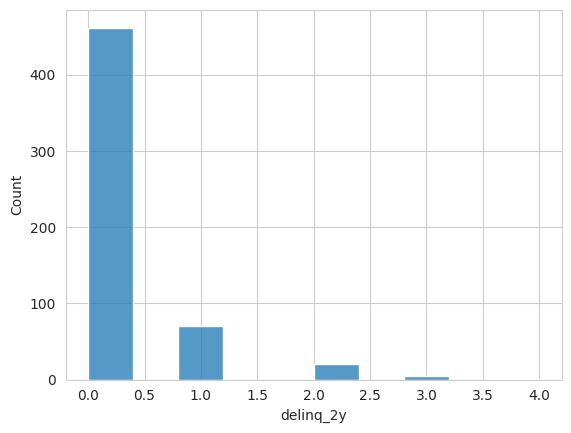

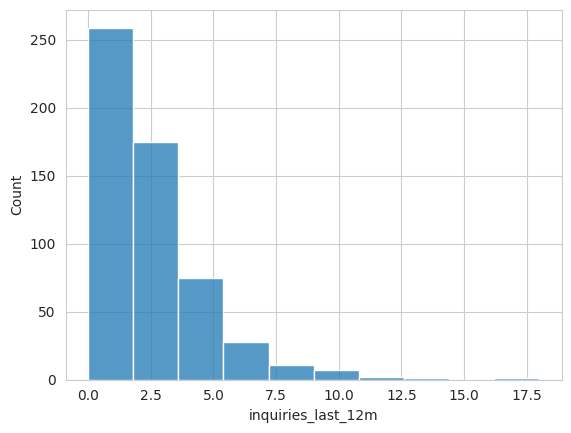

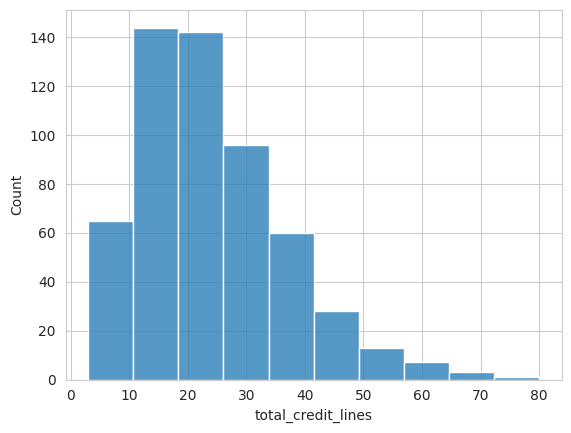

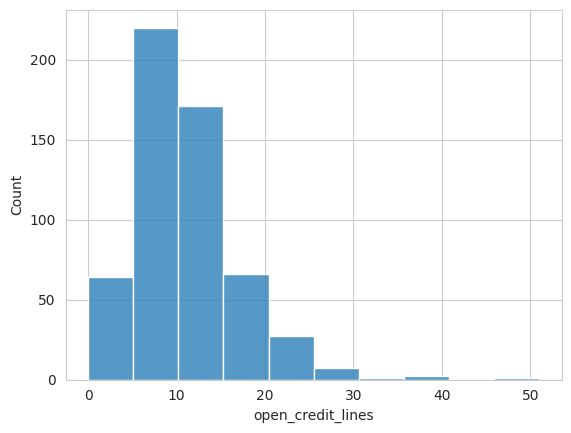

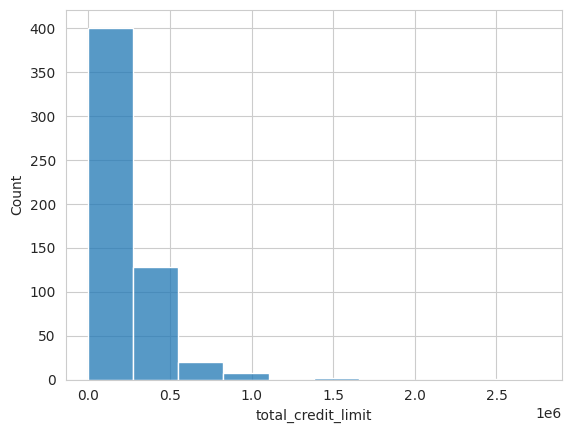

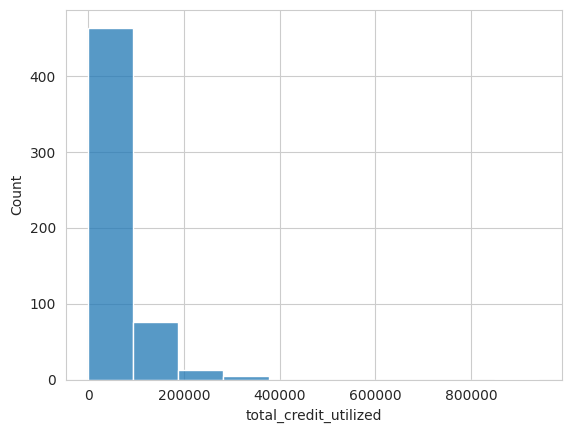

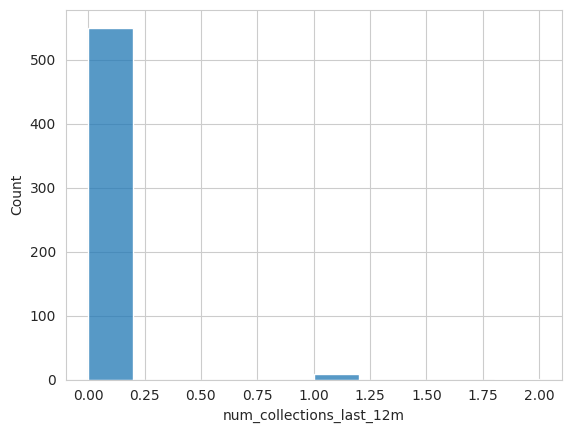

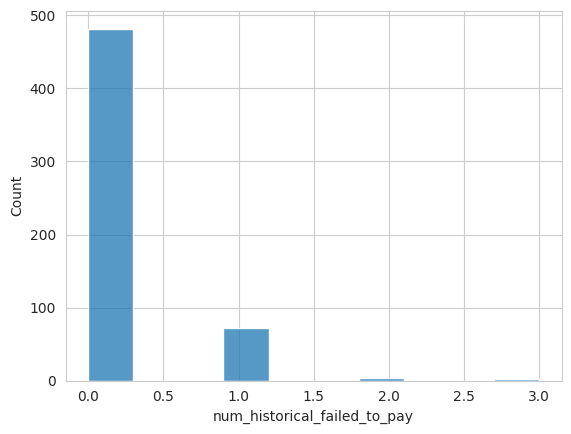

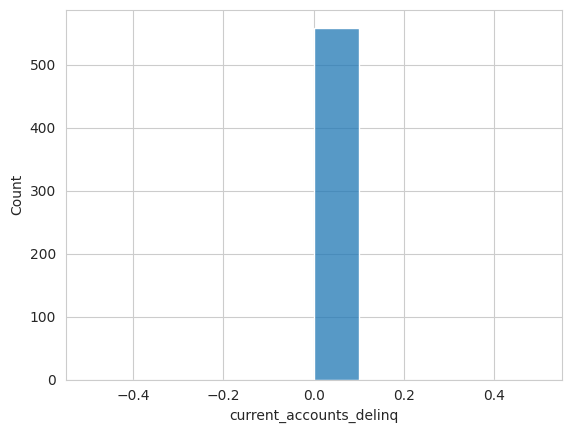

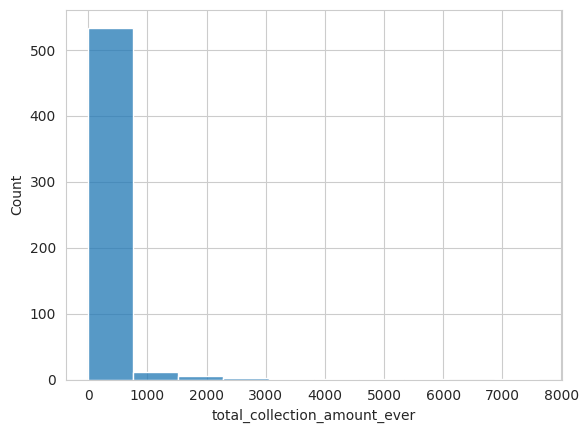

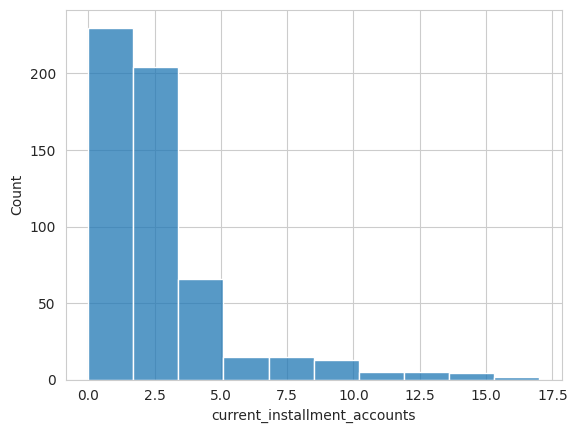

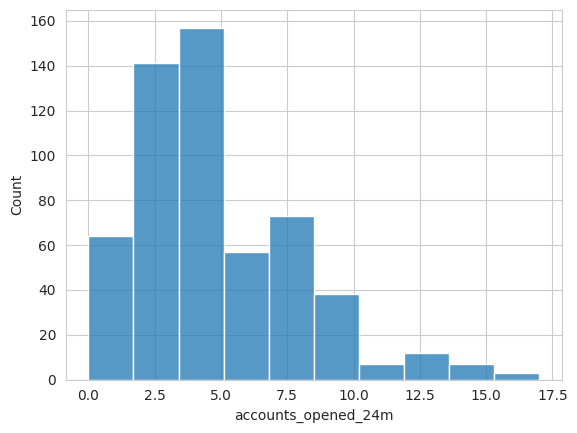

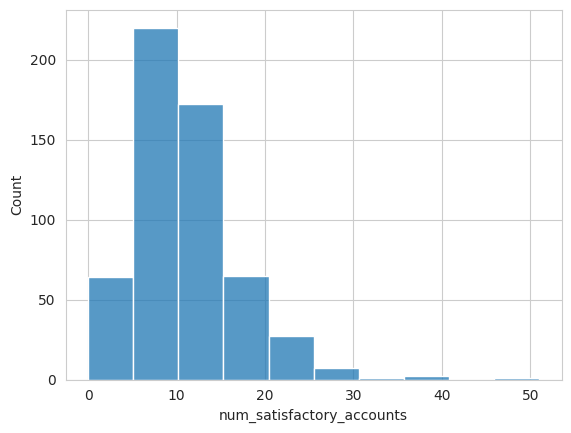

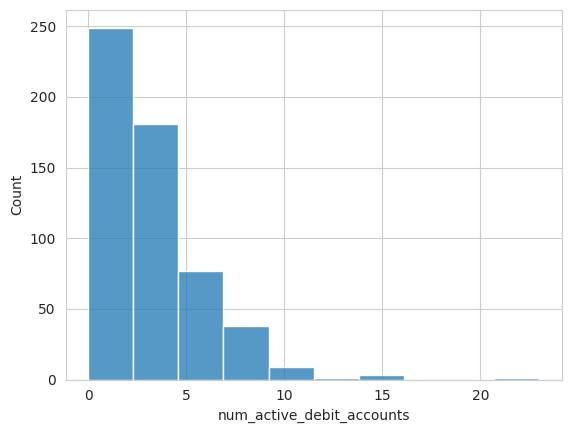

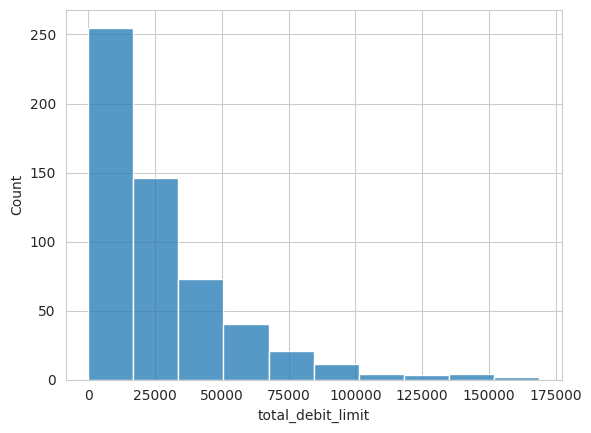

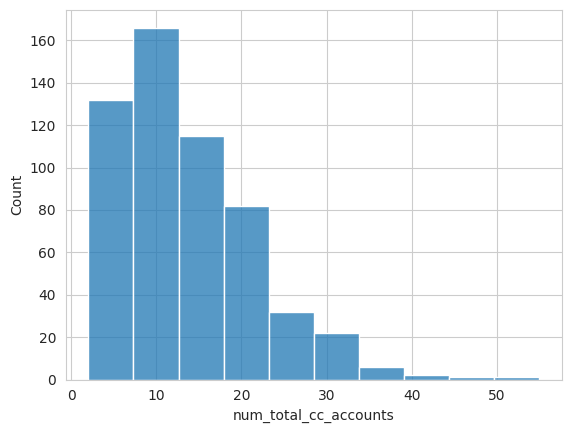

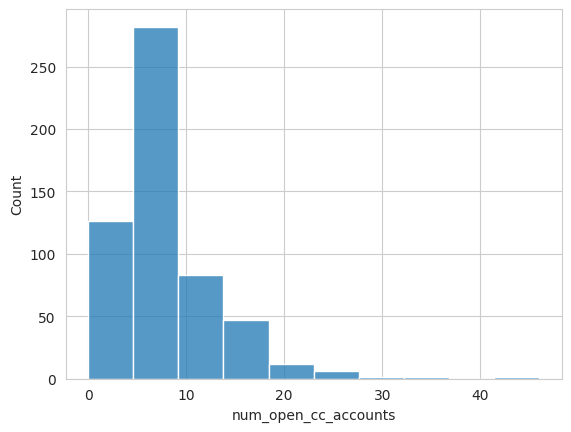

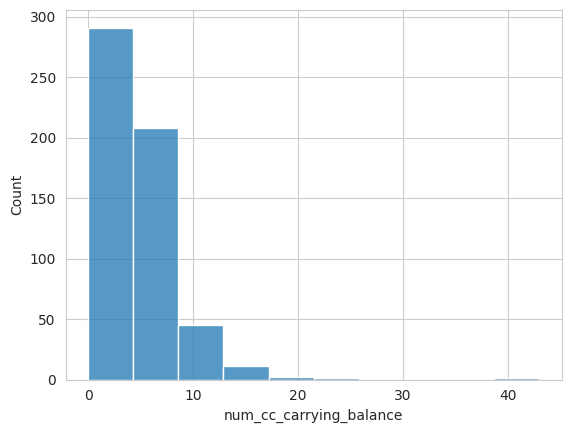

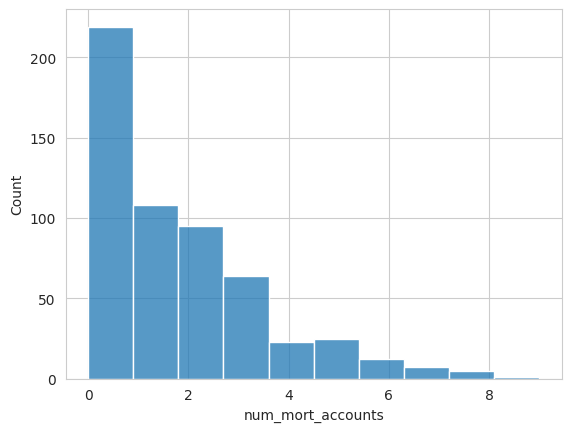

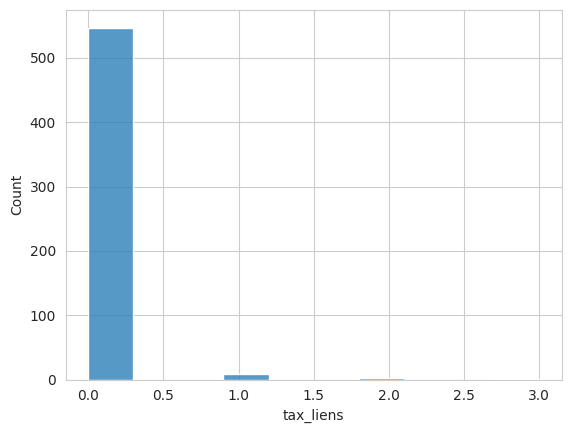

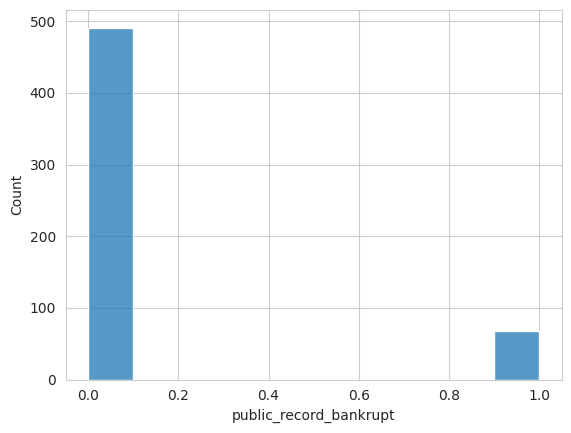

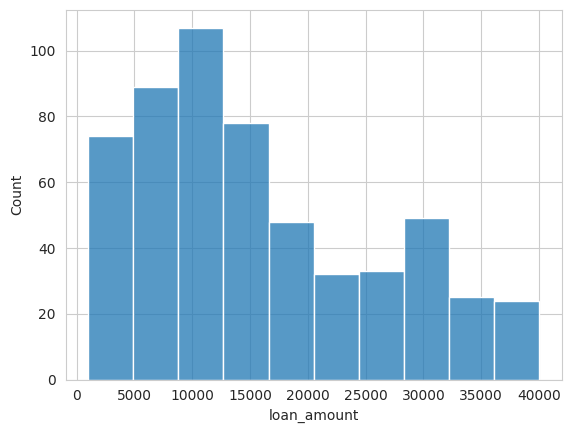

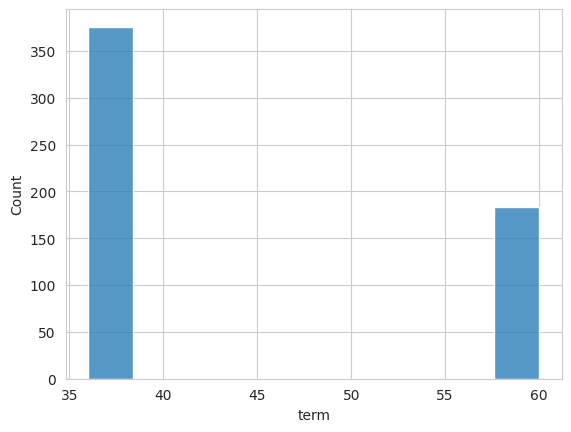

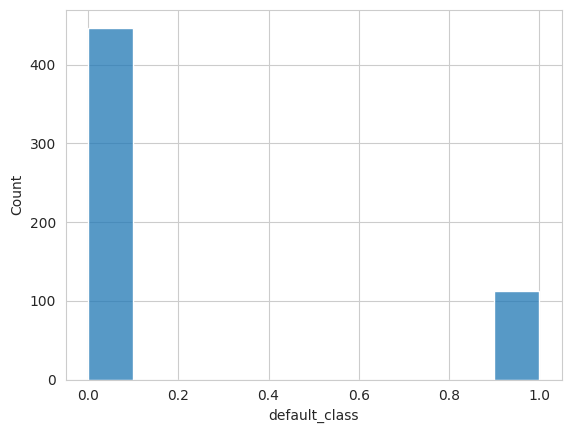

In [ ]:
df_int = loan_df_5.select_dtypes(include = ['int64'])
for i, col in enumerate(df_int.columns):
  plt.figure(i)
# plot feature distribution
  sns.histplot(x = col, data = df_int, bins =10)

# show histplot
plt.show()



Text(0, 0.5, 'Number of satisfactory accounts')

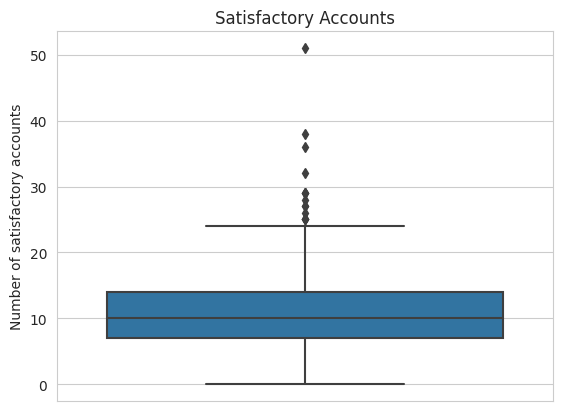

In [ ]:
sns.boxplot(y= loan_df_5['num_satisfactory_accounts'])

plt.title('Satisfactory Accounts')

plt.ylabel('Number of satisfactory accounts')

Text(0, 0.5, 'loan amount')

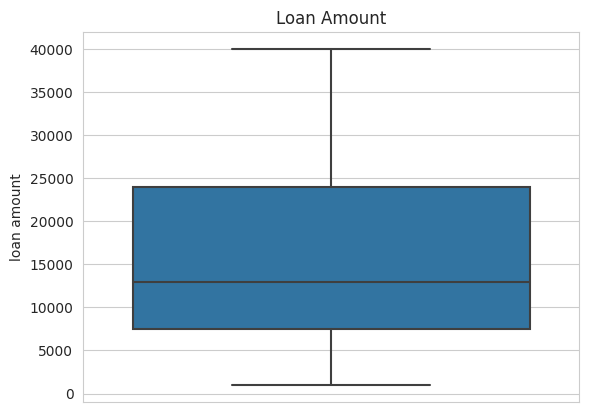

In [ ]:
sns.boxplot(y= loan_df_5['loan_amount'])
plt.title('Loan Amount')
plt.ylabel('loan amount')

Text(0.5, 1.0, 'Open Credit Lines')

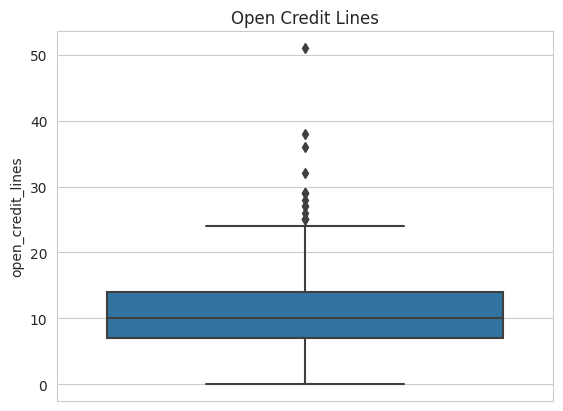

In [ ]:
sns.boxplot(y = loan_df_5['open_credit_lines'])
plt.title('Open Credit Lines')


Text(0.5, 1.0, 'Number of total accounts')

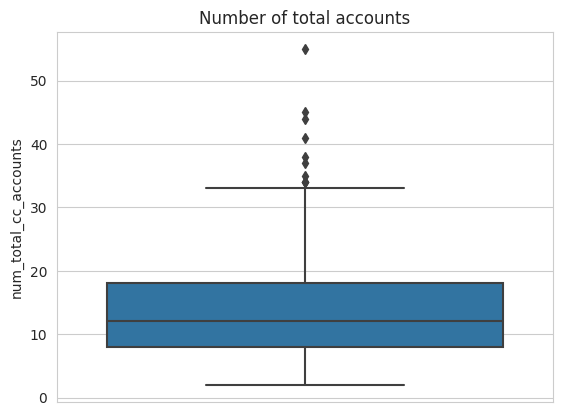

In [ ]:
sns.boxplot(y = loan_df_5['num_total_cc_accounts'])
plt.title('Number of total accounts')

Bivariate Analysis

Text(0.5, 1.0, 'Loan count by state')

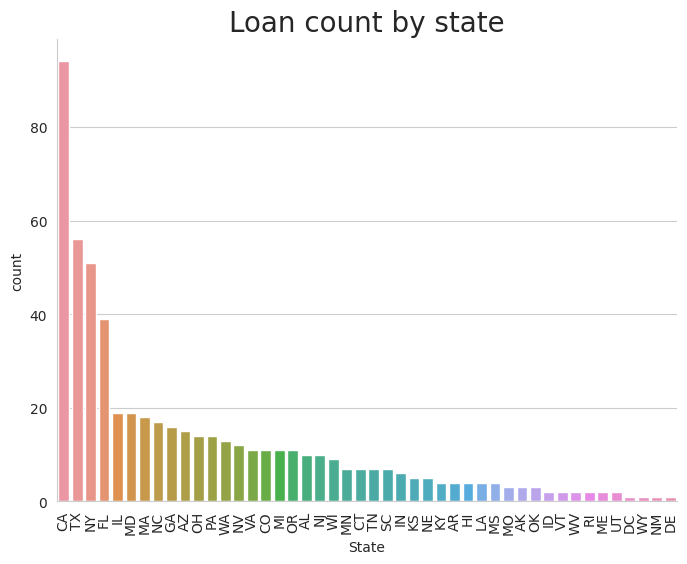

In [ ]:
fig, ax =plt.subplots(figsize=(8,6))

sns.despine()

order = loan_df_5["state"].value_counts().index

sns.countplot(data=loan_df_5, x="state", order=order)

ax.tick_params(axis='x', labelrotation=90)

ax.set(xlabel='State', ylabel='count')

ax.set_title('Loan count by state', size=20)

BIVARIATE ANALYSIS

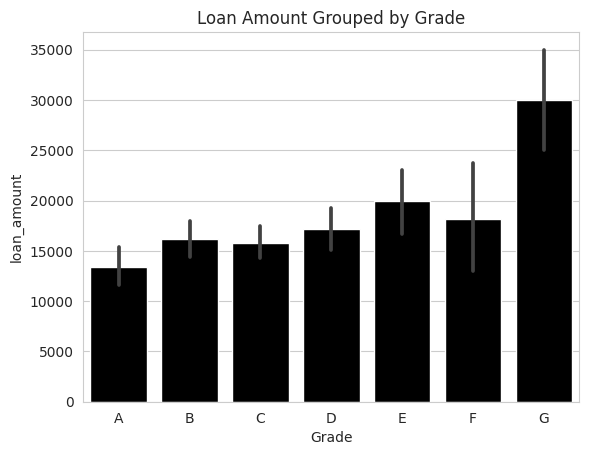

In [ ]:
g_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

sns.despine()

sns.barplot(x= 'grade', y = 'loan_amount', data = loan_df_5, order = g_order, color ='black')

plt.title('Loan Amount Grouped by Grade')

# plt.legend(title = 'Grade')
plt.xlabel('Grade')
plt.ylabel('loan_amount')

# show grade plot
plt.show()

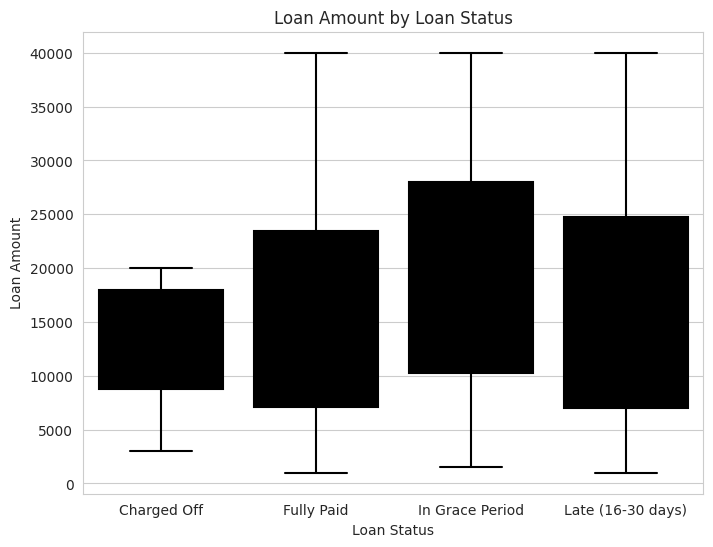

In [ ]:
# group data by loan status and get count for each category
loan_status_count = loan_df_5.groupby('loan_status')['loan_status'].count()

# create boxplot using loan status count
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='loan_status', y='loan_amount', data=loan_df_5, order=loan_status_count.index, color = 'black')

ax.set_title('Loan Amount by Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Loan Amount')
plt.show()

Text(0.5, 0, 'Installments per default_class')

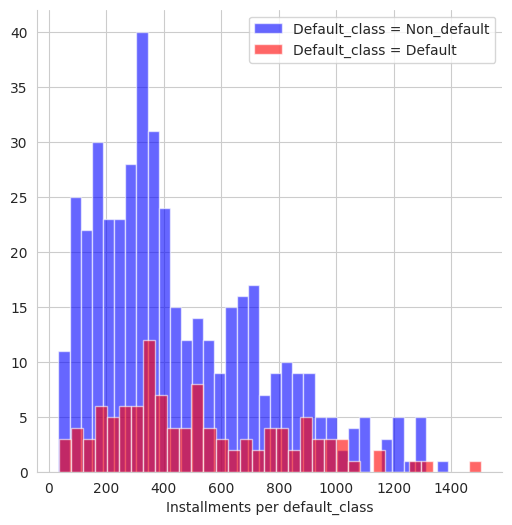

In [ ]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)

ax.grid(False, which = 'both')
sns.despine()

loan_df_5[loan_df_5['default_class']== 0] ['installment'].hist(bins = 35, color= 'blue', label = 'Default_class = Non_default', alpha = 0.6)
                                                                
loan_df_5[loan_df_5['default_class']== 1] ['installment'].hist(bins = 35, color = 'red', label = 'Default_class = Default', alpha = 0.6)
                                                               
plt.legend()
plt.xlabel('Installments per default_class')

Text(0.5, 0, 'Number of satisfactory user accounts per class')

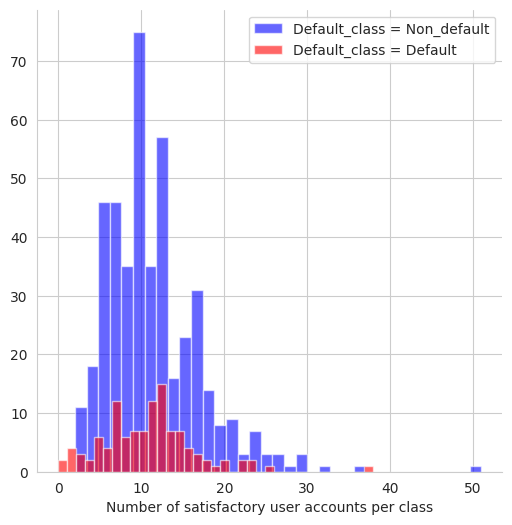

In [ ]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)

ax.grid(False, which = 'both')

sns.despine()

loan_df_5[loan_df_5['default_class']== 0] ['num_satisfactory_accounts'].hist(bins = 35, color= 'blue', label = 'Default_class = Non_default', alpha = 0.6)
                                                             
loan_df_5[loan_df_5['default_class']== 1] ['num_satisfactory_accounts'].hist(bins = 35, color = 'red', label = 'Default_class = Default', alpha = 0.6)
                                                               
plt.legend()
plt.xlabel('Number of satisfactory user accounts per class')

Text(0.5, 0, 'Loan Amount per default_class')

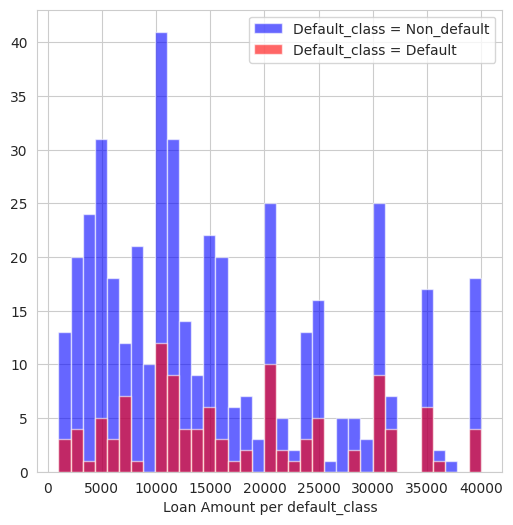

In [ ]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)

ax.grid(False, which = 'both')

loan_df_5[loan_df_5['default_class']== 0] ['loan_amount'].hist(bins = 35, color= 'blue', label = 'Default_class = Non_default', alpha = 0.6)
                                                                
loan_df_5[loan_df_5['default_class']== 1] ['loan_amount'].hist(bins = 35, color = 'red', label = 'Default_class = Default', alpha = 0.6)
                                                               
plt.legend()
plt.xlabel('Loan Amount per default_class')

Text(0.5, 0, 'Number of satisfactory user accounts per class')

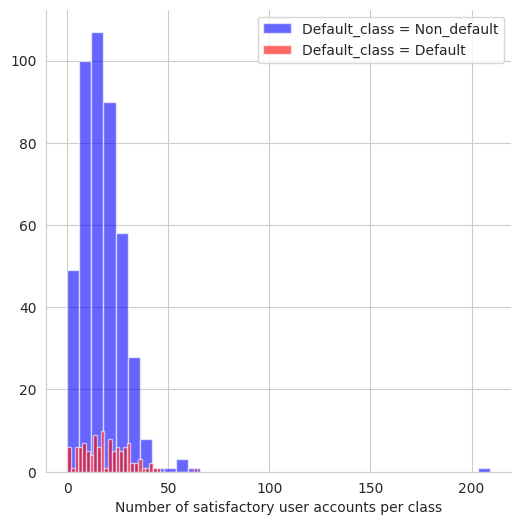

In [ ]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)

ax.grid(False, which = 'both')

sns.despine()

loan_df_5[loan_df_5['default_class']== 0] ['debt_to_income'].hist(bins = 35, color= 'blue', label = 'Default_class = Non_default', alpha = 0.6)
                                                             
loan_df_5[loan_df_5['default_class']== 1] ['debt_to_income'].hist(bins = 35, color = 'red', label = 'Default_class = Default', alpha = 0.6)
                                                               
plt.legend()
plt.xlabel('Number of satisfactory user accounts per class')

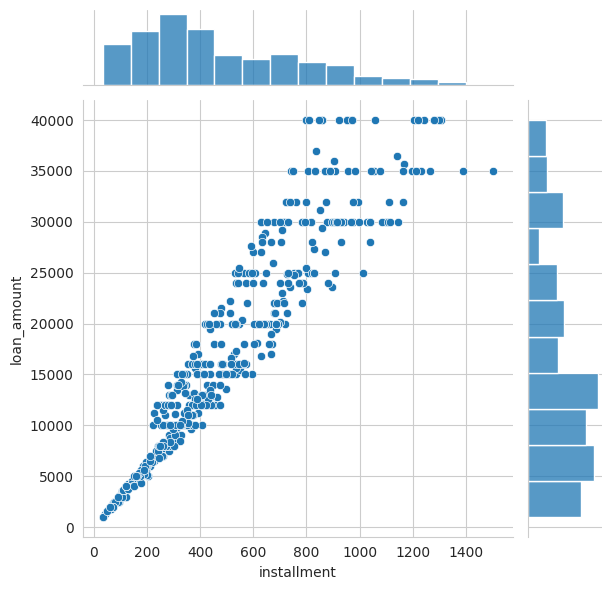

In [ ]:
sns.jointplot(data = loan_df_5, x = 'installment', y = 'loan_amount')


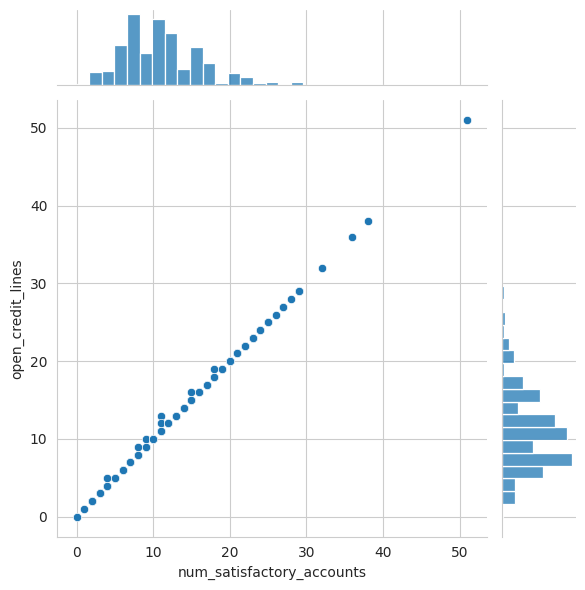

In [ ]:
sns.jointplot(data = loan_df_5, x = 'num_satisfactory_accounts', y = 'open_credit_lines')


Multivariate Analysis

In [ ]:
# Heatmap using integer attributes only
df_int.corr() 


,delinq_2y,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,...,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,tax_liens,public_record_bankrupt,loan_amount,term,default_class
delinq_2y,1.000000,0.001779,0.105328,0.067395,0.045673,0.045448,0.056914,-0.098837,NaN,-0.011017,...,-0.091422,0.083493,0.045671,0.053463,0.122177,-0.025500,-0.104229,0.039077,0.014039,0.052564
inquiries_last_12m,0.001779,1.000000,0.185047,0.156721,0.050997,0.049120,-0.010285,0.073220,NaN,0.031764,...,-0.026894,0.107465,0.149658,0.088810,0.067747,0.036844,0.065474,0.047797,0.076727,0.042006
total_credit_lines,0.105328,0.185047,1.000000,0.720884,0.280832,0.393045,-0.009947,0.010699,NaN,0.007310,...,0.314960,0.779228,0.581588,0.389031,0.311152,0.029939,-0.006491,0.120779,0.023657,-0.090081
open_credit_lines,0.067395,0.156721,0.720884,1.000000,0.226872,0.298911,0.004792,0.056895,NaN,0.016774,...,0.415740,0.722930,0.868484,0.682410,0.112412,0.104754,0.001096,0.140491,0.048848,-0.023495
total_credit_limit,0.045673,0.050997,0.280832,0.226872,1.000000,0.582806,-0.021030,0.098166,NaN,-0.021529,...,0.474681,0.155702,0.131511,0.118369,0.500777,0.250833,-0.043946,0.309019,0.110213,-0.032763
total_credit_utilized,0.045448,0.049120,0.393045,0.298911,0.582806,1.000000,-0.015228,0.055076,NaN,-0.055850,...,0.249865,0.125641,0.112914,0.182075,0.147572,0.221327,-0.077362,0.220344,0.052204,0.021880
num_collections_last_12m,0.056914,-0.010285,-0.009947,0.004792,-0.021030,-0.015228,1.000000,0.015300,NaN,0.056130,...,-0.052050,-0.002198,-0.001921,-0.003585,-0.018147,0.041078,-0.008146,-0.004837,-0.007175,-0.030844
num_historical_failed_to_pay,-0.098837,0.073220,0.010699,0.056895,0.098166,0.055076,0.015300,1.000000,NaN,0.023247,...,-0.094032,0.008707,0.060947,0.043616,-0.011746,0.577563,0.845584,-0.019627,0.042911,-0.042809
current_accounts_delinq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_collection_amount_ever,-0.011017,0.031764,0.007310,0.016774,-0.021529,-0.055850,0.056130,0.023247,NaN,1.000000,...,-0.095277,0.037939,0.027499,-0.019192,0.003263,0.058409,-0.009759,-0.061038,-0.018513,-0.000791


In [ ]:
# drop column with nan values
df_3 = df_int.drop('current_accounts_delinq', axis = 1)

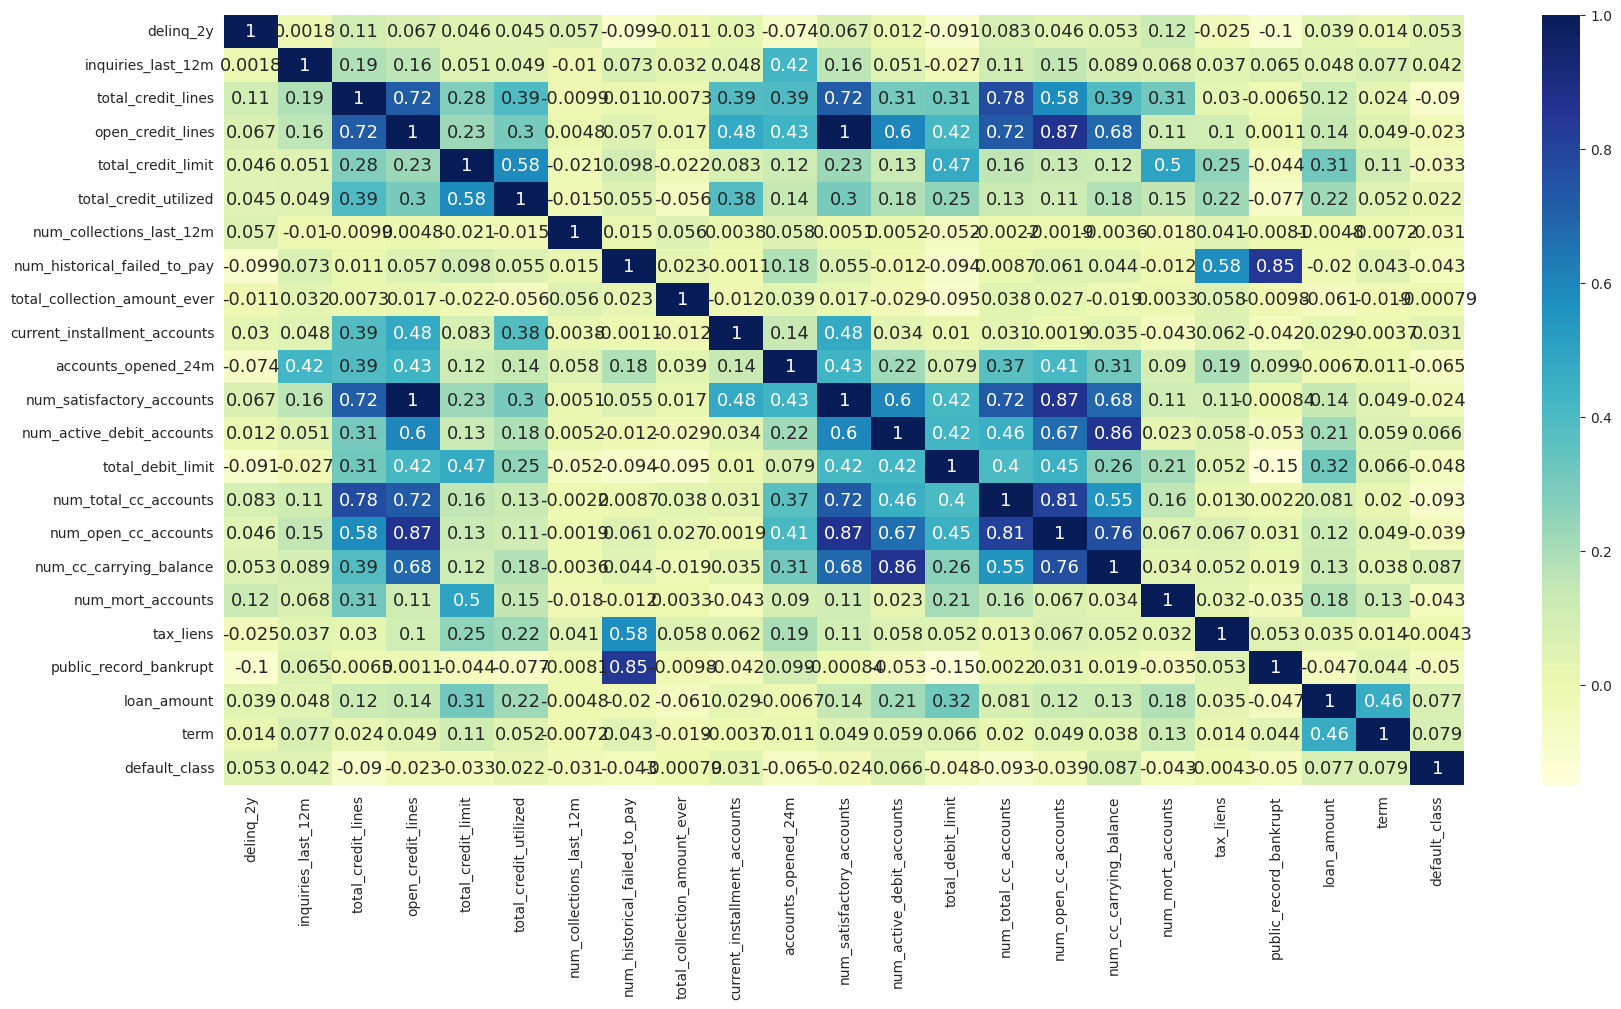

In [ ]:
# plot corelation heatmap for int values; df_3

fig, ax = plt.subplots(figsize=(20,10))
dataplot = sns.heatmap(df_3.corr(), cmap ='YlGnBu', annot = True, annot_kws={'size':13}, ax =ax)

plt.show()

In [ ]:
loan_df_5 = loan_df_5.drop('current_accounts_delinq', axis = 1)

In [ ]:
loan_df_5.corr()

,emp_length,annual_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,...,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees,default_class
emp_length,1.000000,0.002350,0.046238,0.022876,-0.025985,0.075600,0.066518,0.059259,-0.034439,-0.037417,...,0.062385,0.041817,-0.073635,0.046742,-0.009407,0.058785,0.062759,-0.074396,-0.027791,-0.004133
annual_income,0.002350,1.000000,-0.142200,0.023105,0.021079,0.089278,0.066856,0.643876,0.651386,-0.014500,...,0.250693,0.031801,-0.040466,0.257544,0.033710,0.217807,0.212901,0.154893,-0.009746,-0.002240
debt_to_income,0.046238,-0.142200,1.000000,-0.010834,0.027018,0.234980,0.244352,0.041726,0.333202,0.007323,...,0.034652,0.048091,0.127280,0.043836,0.068716,-0.014708,-0.019856,0.109566,0.047617,0.051319
delinq_2y,0.022876,0.023105,-0.010834,1.000000,0.001779,0.105328,0.067395,0.045673,0.045448,0.056914,...,0.039077,0.014039,0.102032,0.060901,0.071787,-0.004151,-0.008902,0.103559,-0.010261,0.052564
inquiries_last_12m,-0.025985,0.021079,0.027018,0.001779,1.000000,0.185047,0.156721,0.050997,0.049120,-0.010285,...,0.047797,0.076727,0.126253,0.043890,0.071573,-0.002693,-0.008225,0.120715,0.029656,0.042006
total_credit_lines,0.075600,0.089278,0.234980,0.105328,0.185047,1.000000,0.720884,0.280832,0.393045,-0.009947,...,0.120779,0.023657,-0.086525,0.115966,-0.027767,0.135937,0.135110,0.048335,-0.104493,-0.090081
open_credit_lines,0.066518,0.066856,0.244352,0.067395,0.156721,0.720884,1.000000,0.226872,0.298911,0.004792,...,0.140491,0.048848,-0.015389,0.136242,0.037686,0.109752,0.106941,0.086100,-0.084894,-0.023495
total_credit_limit,0.059259,0.643876,0.041726,0.045673,0.050997,0.280832,0.226872,1.000000,0.582806,-0.021030,...,0.309019,0.110213,-0.125980,0.274678,0.020608,0.272138,0.268679,0.135114,-0.046358,-0.032763
total_credit_utilized,-0.034439,0.651386,0.333202,0.045448,0.049120,0.393045,0.298911,0.582806,1.000000,-0.015228,...,0.220344,0.052204,0.054444,0.234122,0.062701,0.169836,0.162546,0.197041,-0.027081,0.021880
num_collections_last_12m,-0.037417,-0.014500,0.007323,0.056914,-0.010285,-0.009947,0.004792,-0.021030,-0.015228,1.000000,...,-0.004837,-0.007175,0.086078,0.013775,-0.031949,0.021063,0.020083,0.026212,-0.017752,-0.030844


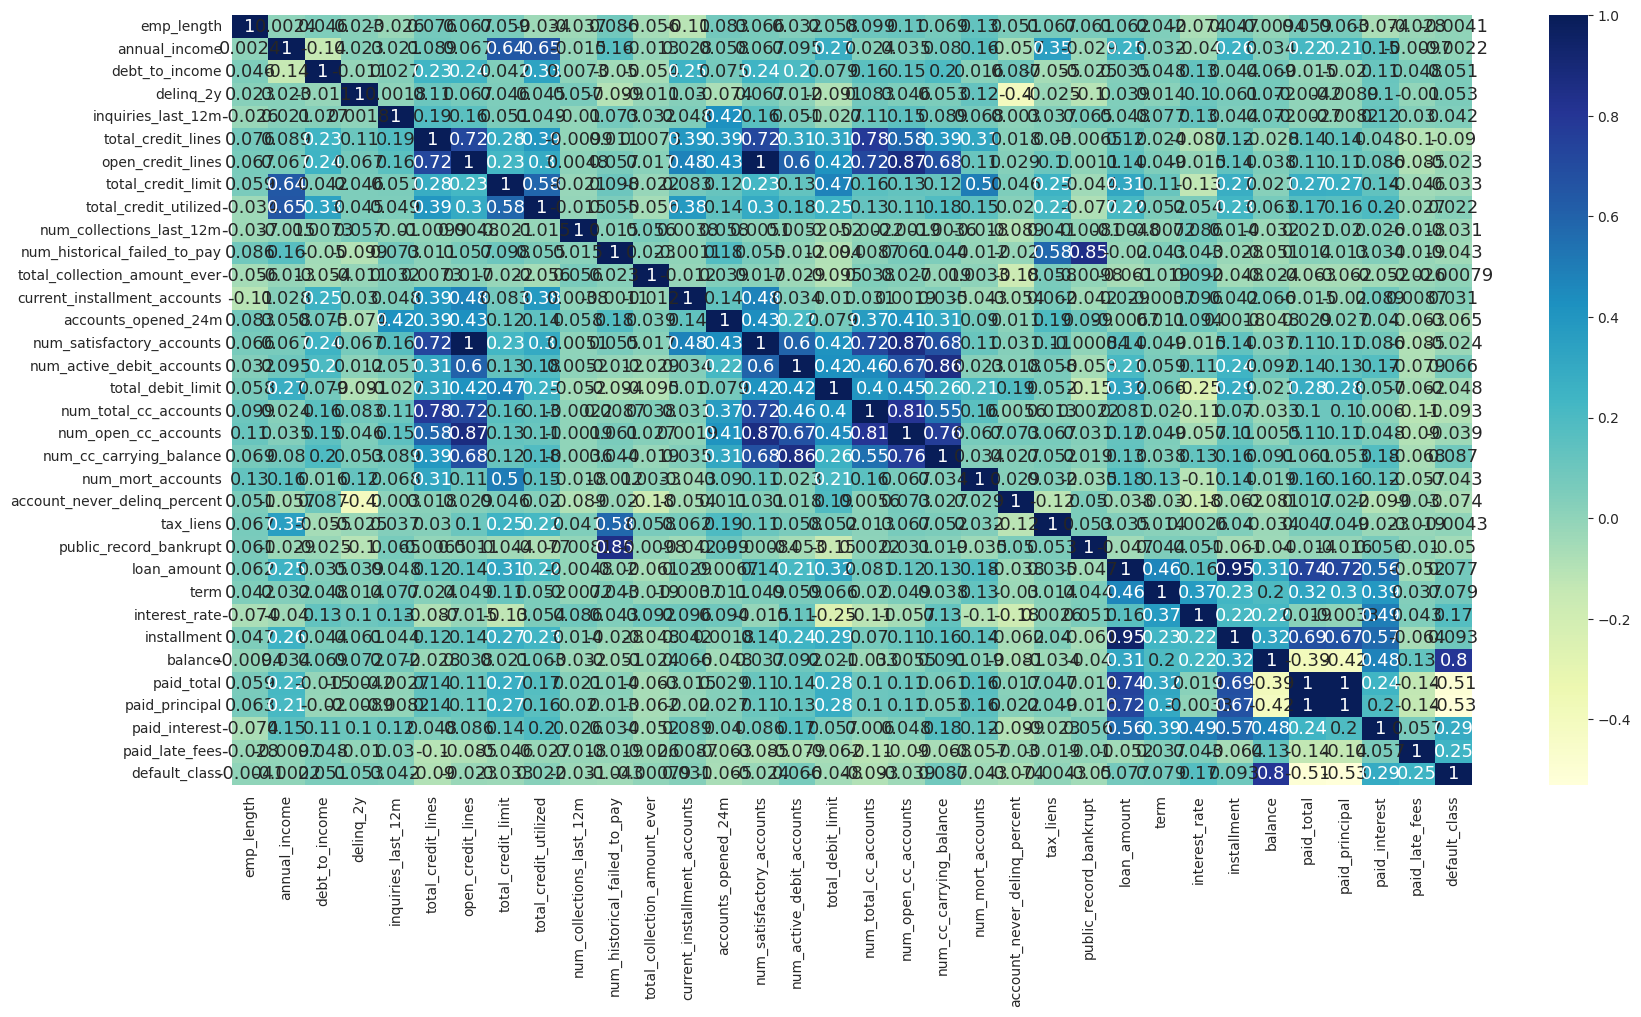

In [ ]:
# show correlation of all attributes in the dataset
fig, ax = plt.subplots(figsize=(20,10))
dataplot = sns.heatmap(loan_df_5.corr(), cmap ='YlGnBu', annot = True, annot_kws={'size':13}, ax =ax)

# show plot
plt.show()

In [ ]:
print(loan_df_5.shape)
loan_df_5.info()

(559, 41)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 18 to 9984
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   emp_length                    559 non-null    float64
 1   state                         559 non-null    object 
 2   homeownership                 559 non-null    object 
 3   annual_income                 559 non-null    float64
 4   verified_income               559 non-null    object 
 5   debt_to_income                559 non-null    float64
 6   delinq_2y                     559 non-null    int64  
 7   inquiries_last_12m            559 non-null    int64  
 8   total_credit_lines            559 non-null    int64  
 9   open_credit_lines             559 non-null    int64  
 10  total_credit_limit            559 non-null    int64  
 11  total_credit_utilized         559 non-null    int64  
 12  num_collections_last_12m      559 non-null    int64 

In [ ]:
loan_df_5.describe()

,emp_length,annual_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,...,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees,default_class
count,559.000000,5.590000e+02,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02,559.000000,559.000000,...,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,5.918211,8.648315e+04,17.820250,0.234347,2.295170,24.012522,11.277281,2.058363e+05,55351.107335,0.017889,...,15993.336315,43.856887,13.900215,470.522272,3192.783041,13070.838556,12647.468766,422.814955,0.554651,0.200358
std,3.679712,1.123967e+05,13.110771,0.574707,2.336517,12.533890,5.722373,2.283216e+05,64221.012118,0.145550,...,10521.306323,11.272175,5.682759,301.598914,7973.339606,11197.682515,11088.686539,504.741895,3.847031,0.400627
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000,0.000000,...,1000.000000,36.000000,5.310000,33.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.800000e+04,10.015000,0.000000,1.000000,14.000000,7.000000,5.732850e+04,18618.500000,0.000000,...,7500.000000,36.000000,9.440000,243.855000,0.000000,3526.893776,3021.560000,65.765000,0.000000,0.000000
50%,5.920000,6.780000e+04,16.340000,0.000000,2.000000,22.000000,10.000000,1.318380e+05,39642.000000,0.000000,...,13000.000000,36.000000,13.590000,384.060000,0.000000,10225.748892,10000.000000,221.830000,0.000000,0.000000
75%,10.000000,1.000000e+05,23.875000,0.000000,3.000000,31.000000,14.000000,3.061440e+05,72060.500000,0.000000,...,24000.000000,60.000000,17.090000,676.390000,0.000000,20097.121275,20000.000000,602.905000,0.000000,0.000000
max,10.000000,2.300000e+06,209.100000,4.000000,18.000000,80.000000,51.000000,2.761000e+06,942456.000000,2.000000,...,40000.000000,60.000000,30.940000,1503.890000,39115.590000,41630.443684,40000.000000,3080.080000,52.980000,1.000000


In [ ]:
# encode categorical data
cat_cols = ['state', 'homeownership','grade', 'verified_income','sub_grade',
          'loan_purpose', 'loan_status']
  
loan_df_6 = pd.get_dummies(loan_df_5, columns = cat_cols)

# loan_data.info()
print(loan_df_6.shape)
loan_df_6.info()

(559, 139)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 18 to 9984
Columns: 139 entries, emp_length to loan_status_Late (16-30 days)
dtypes: float64(11), int64(23), uint8(105)
memory usage: 210.2 KB


TRAIN DATA MODEL BY SPLITTING IT INTO TRAIN TEST GROUPS.
- In order to ensure the best model is selected, we'd compare the accuracy results for different splits groups.

i.e

train:test


75:25

70:30

60:40

55:45

respectively, for the train_test splits

In [ ]:
# Define X(datasets) and y(target attribute) for your test split

X = loan_df_6.drop('default_class', axis = 1)
y = loan_df_6['default_class']

print('number of class values::\n',y.shape)
print(X.shape)
X.head(5)

number of class values::
 (559,)
(559, 138)


,emp_length,annual_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,...,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_small_business,loan_purpose_vacation,loan_status_Charged Off,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days)
18,10.0,210000.0,9.53,0,2,18,7,322046,73705,0,...,0,1,0,0,0,0,0,1,0,0
19,1.0,83000.0,18.44,3,1,11,6,555154,39482,0,...,0,0,0,0,0,0,0,1,0,0
34,10.0,140000.0,13.82,0,2,21,12,631258,69647,0,...,0,0,0,0,0,0,0,1,0,0
35,1.0,70000.0,0.00,0,0,13,3,30400,92,0,...,0,0,0,0,1,0,0,1,0,0
37,10.0,70000.0,17.06,0,2,21,14,363649,29954,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# TrainTest split 75:25

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.25, random_state = 1042, stratify= y)

print('count of class labels in the target variable; "Default_class ::\n', np.bincount(y))
print('count of class labels in y_train (75% of X) ::\n', np.bincount(y_train_1))
print('count of class labels in y_test (25% of X) :: \n', np.bincount(y_test_1))

count of class labels in the target variable; "Default_class ::
 [447 112]
count of class labels in y_train (75% of X) ::
 [335  84]
count of class labels in y_test (25% of X) :: 
 [112  28]


In [ ]:
# TrainTest split 70:30

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.3, random_state = 1042, stratify= y)

print('count of class labels in the target variable; "Default_class ::\n', np.bincount(y))
print('count of class labels in y_train (70% of X) ::\n', np.bincount(y_train_2))
print('count of class labels in y_test (30% of X) :: \n', np.bincount(y_test_2))

count of class labels in the target variable; "Default_class ::
 [447 112]
count of class labels in y_train (70% of X) ::
 [313  78]
count of class labels in y_test (30% of X) :: 
 [134  34]


In [ ]:
# TrainTest split 60:40

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.4, random_state = 1042, stratify= y)

print('count of class labels in the target variable; "Default_class ::\n', np.bincount(y))
print('count of class labels in y_train (60% of X) ::\n', np.bincount(y_train_3))
print('count of class labels in y_test (40% of X) :: \n', np.bincount(y_test_3))

count of class labels in the target variable; "Default_class ::
 [447 112]
count of class labels in y_train (60% of X) ::
 [268  67]
count of class labels in y_test (40% of X) :: 
 [179  45]


In [ ]:
# TrainTest split 55:45

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size = 0.45, random_state = 1042, stratify= y)

print('count of class labels in the target variable; "Default_class ::\n', np.bincount(y))
print('count of class labels in y_train (55% of X) ::\n', np.bincount(y_train_4))
print('count of class labels in y_test (45% of X) :: \n', np.bincount(y_test_4))

count of class labels in the target variable; "Default_class ::
 [447 112]
count of class labels in y_train (55% of X) ::
 [245  62]
count of class labels in y_test (45% of X) :: 
 [202  50]


Feature Scaling for each train:test splits

In [ ]:
# 75:25
sc = MinMaxScaler()
sc.fit(X_train_1)

sc_train_data= sc.transform(X_train_1)
sc_test_data1 = sc.transform(X_test_1)

print(sc_train_data.shape)


(419, 138)


In [ ]:
# 70:30
sc = MinMaxScaler()
sc.fit(X_train_2)

sc_train_data= sc.transform(X_train_2)
sc_test_data = sc.transform(X_test_2)

print(sc_train_data.shape)

(391, 138)


In [ ]:
# 60:40
sc = MinMaxScaler()
sc.fit(X_train_3)

sc_train_data= sc.transform(X_train_3)
sc_test_data = sc.transform(X_test_3)

print(sc_train_data.shape)

(335, 138)


In [ ]:
# 55:45
sc = MinMaxScaler()
sc.fit(X_train_4)

sc_train_data= sc.transform(X_train_4)
sc_test_data = sc.transform(X_test_4)

print(sc_train_data.shape)

(307, 138)


Class Balancing Using SMOTE estimator or KSMOTE.


To prevent the model from overfitting, the class variables in the train dataset i.e y_train would be selected in this step.

In [ ]:
# count of target variables
non_default, default = np.bincount(y_train_1)
total = non_default + default

print('Examples: \n Total: {}\n Non_default: {} ({: .2f}% of total)\n'.format(total, non_default, 100*non_default / total))

print( ' Default: ', default)

Examples: 
 Total: 419
 Non_default: 335 ( 79.95% of total)

 Default:  84


In [ ]:
y_train_1.value_counts()

0    335
1     84
Name: default_class, dtype: int64

CLASS BALANCING USING SMOTE

In [ ]:
# Class Balancing using SMOTE
sm = SMOTE(random_state = 42)

X_train_resample, y_train_resample = sm.fit_resample(X_train_1, y_train_1)

print("Number of variable instances in X_train_resampled ::",  X_train_resample.shape)
print("Number of variable instances in y_train_resampled ::",  y_train_resample.shape)


Number of variable instances in X_train_resampled :: (670, 138)
Number of variable instances in y_train_resampled :: (670,)


In [ ]:
y_train_resample.value_counts()

1    335
0    335
Name: default_class, dtype: int64

<Axes: xlabel='default_class', ylabel='count'>

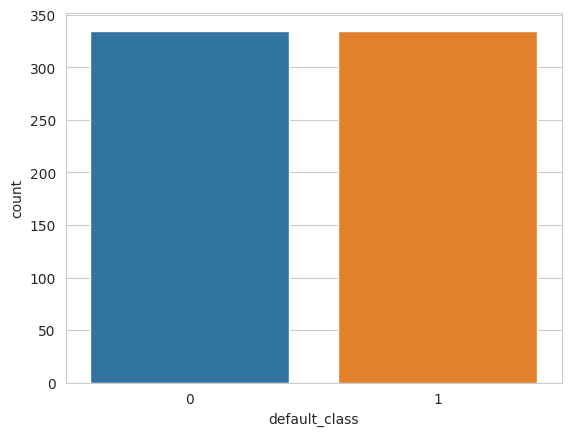

In [ ]:
sns.countplot(data = y_train_resample, x= y_train_resample, label = 'counts')

CLASS BALANCING USING KMEANS-SMOTE

In [ ]:
kmeans_sm = KMeansSMOTE(random_state = 42, cluster_balance_threshold= 0.1)

X_train_re, y_train_re = kmeans_sm.fit_resample(X_train_1, y_train_1)

print("Number of variable instances in X_train_resampled ::",  X_train_re.shape)
print("Number of variable instances in y_train_resampled ::",  y_train_re.shape)

Number of variable instances in X_train_resampled :: (676, 138)
Number of variable instances in y_train_resampled :: (676,)


In [ ]:
y_train_re.value_counts()

1    341
0    335
Name: default_class, dtype: int64

<Axes: xlabel='default_class', ylabel='count'>

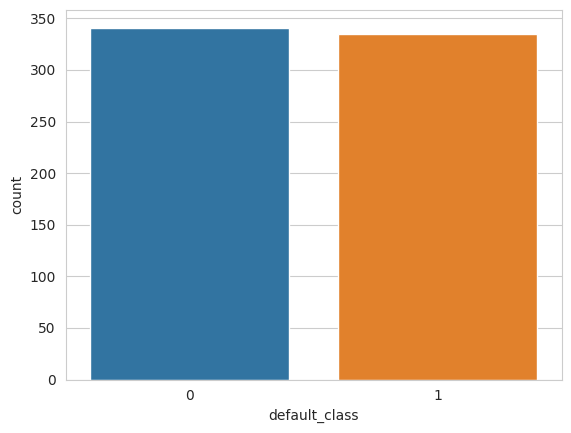

In [ ]:
sns.countplot(data = y_train_re, x= y_train_re, label = 'counts')

Compare accuracy of the training model, for SMOTE and KMeans SMOTE data, using XGBOOST Classifier

DATA TUNING AND MODELING

Best hyperparameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
Runtime:  62.82655453681946 seconds
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[112   0]
 [  0  28]]
Runtime:  0.004826068878173828 seconds


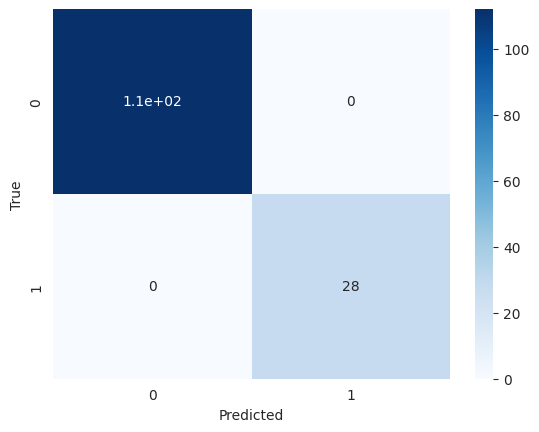

In [ ]:
# Define hyperparameters to search over
param_grid = {'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5, 7],'n_estimators': [50, 100, 200], 'subsample': [0.5, 0.8, 1.0],}


# Initialize XGBoost classifier
xgb_clf_sm = xgb.XGBClassifier()

# Create a GridSearchCV object and fit on the training data
start_time = time.time()
grid_search = GridSearchCV(xgb_clf_sm, param_grid=param_grid, cv=5)
grid_search.fit(X_train_re, y_train_re)
end_time = time.time()

# Print the best hyperparameters found by the search
print("Best hyperparameters: ", grid_search.best_params_)
print("Runtime: ", end_time - start_time, "seconds")

# Train an XGBoost classifier using the best hyperparameters
best_clf = grid_search.best_estimator_
start_time = time.time()
best_clf.fit(X_train_resample, y_train_resample)
end_time = time.time()

# Predict the target variable for the testing data
start_time = time.time()
y_pred_xgb = best_clf.predict(X_test_1)
end_time = time.time()

# Evaluate the performance of the classifier

print("Accuracy:", accuracy_score(y_test_1, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test_1, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred_xgb))
print("Runtime: ", end_time - start_time, "seconds")

# CONFUSION MATRIX HEAT MAP
# Assuming y_true and y_pred are the true and predicted values, respectively
cm = confusion_matrix(y_test_1, y_pred_xgb)

# Plot the confusion matrix as a heatmap

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

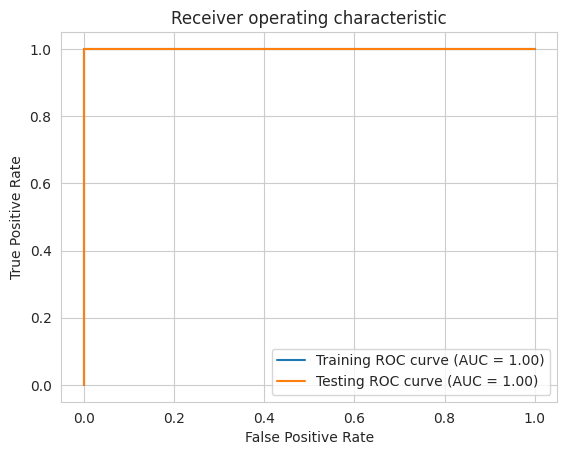

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resample, best_clf.predict_proba(X_train_resample)[:, 1])
auc_train = roc_auc_score(y_train_resample, best_clf.predict_proba(X_train_resample)[:, 1])

# Calculate the false positive rate, true positive rate, and thresholds for the testing data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1, best_clf.predict_proba(X_test_1)[:, 1])
auc_test = roc_auc_score(y_test_1, best_clf.predict_proba(X_test_1)[:, 1])

# Plot the ROC curve and AUC score for the training data
plt.plot(fpr_train, tpr_train, label='Training ROC curve (AUC = %0.2f)' % auc_train)

# Plot the ROC curve and AUC score for the testing data
plt.plot(fpr_test, tpr_test, label='Testing ROC curve (AUC = %0.2f)' % auc_test)

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Best hyperparameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
Runtime:  62.6734344959259 seconds
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[112   0]
 [  0  28]]
Runtime:  0.0051898956298828125


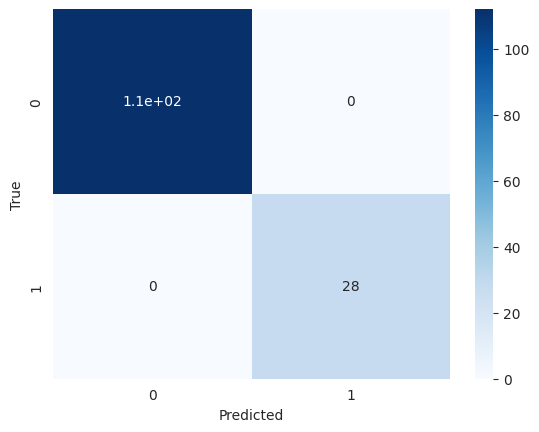

In [ ]:
# Define hyperparameters to search over
param_grid = {'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5, 7],'n_estimators': [50, 100, 200], 'subsample': [0.5, 0.8, 1.0],}


# Initialize XGBoost classifier
xgb_clf_km = xgb.XGBClassifier()

# Create a GridSearchCV object and fit on the training data
start_time = time.time()
grid_search = GridSearchCV(xgb_clf_km, param_grid=param_grid, cv=5)
grid_search.fit(X_train_re, y_train_re)
end_time = time.time()

# Print the best hyperparameters found by the search
print("Best hyperparameters: ", grid_search.best_params_)
print("Runtime: ", end_time - start_time, "seconds")

# Train an XGBoost classifier using the best hyperparameters
best_clf = grid_search.best_estimator_
start_time = time.time()
best_clf.fit(X_train_re, y_train_re)
end_time = time.time() 

# Predict the target variable for the testing data
start_time =time.time()
y_pred = best_clf.predict(X_test_1)
end_time = time.time()

# Evaluate the performance of the classifier

print("Accuracy:", accuracy_score(y_test_1, y_pred))
print("Classification Report:")
print(classification_report(y_test_1, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred))
print("Runtime: ", end_time - start_time)

# CONFUSION MATRIX HEAT MAP
# Assuming y_true and y_pred are the true and predicted values, respectively
cm = confusion_matrix(y_test_1, y_pred)

# Plot the confusion matrix as a heatmap

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Compare accuracy of the training model, for SMOTE and KMeans SMOTE data, using Random Forest Classifier

Model Tuning and training using GridSearchCV

In [ ]:
from pandas.core.ops.array_ops import ensure_wrapped_if_datetimelike
# Define the hyperparameters to tune and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForest classifier
RF_clf_sm = RandomForestClassifier(max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state= 42)

# Perform hyperparameter tuning using GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(RF_clf_sm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resample, y_train_resample)
end_time = time.time()
# Print the best hyperparameters and their accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
print("Runtime: ", end_time - start_time, "seconds")

# Use the best hyperparameters to train a new random forest classifier
best_rf_clf = RandomForestClassifier(**grid_search.best_params_)

start_time = time.time()
best_rf_clf.fit(X_train_resample, y_train_resample)
end_time = time.time()

# Use the trained model to make predictions on the testing data
start_time = time.time()
y_pred = best_rf_clf.predict(X_test_1)
end_time = time.time()

# Evaluate the performance of the random forest classifier
print("Accuracy:", accuracy_score(y_test_1, y_pred))
print("Classification Report:")
print(classification_report(y_test_1, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred))
print("Runtime: \n", end_time - start_time, "seconds")


Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score:  1.0
Runtime:  57.31703495979309 seconds
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[112   0]
 [  0  28]]
Runtime: 
 0.010308980941772461 seconds


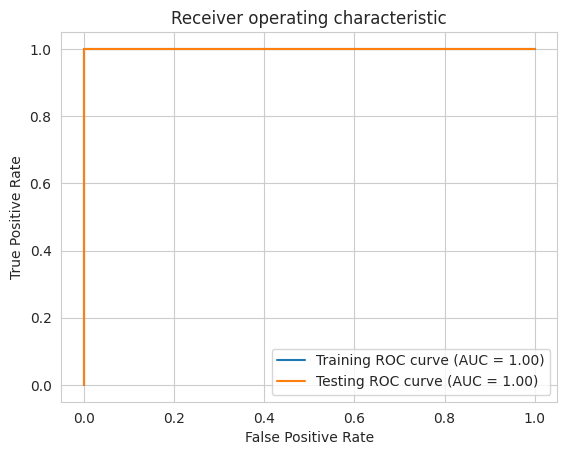

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resample, best_rf_clf.predict_proba(X_train_resample)[:, 1])
auc_train = roc_auc_score(y_train_resample, best_rf_clf.predict_proba(X_train_resample)[:, 1])

# Calculate the false positive rate, true positive rate, and thresholds for the testing data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1, best_rf_clf.predict_proba(X_test_1)[:, 1])
auc_test = roc_auc_score(y_test_1, best_rf_clf.predict_proba(X_test_1)[:, 1])

# Plot the ROC curve and AUC score for the training data
plt.plot(fpr_train, tpr_train, label='Training ROC curve (AUC = %0.2f)' % auc_train)

# Plot the ROC curve and AUC score for the testing data
plt.plot(fpr_test, tpr_test, label='Testing ROC curve (AUC = %0.2f)' % auc_test)

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:

# Define the hyperparameters to tune and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForest classifier
RF_clf_km = RandomForestClassifier(max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state= 42)

# Perform hyperparameter tuning using GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(RF_clf_km, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_re, y_train_re)
end_time = time.time()
# Print the best hyperparameters and their accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
print("Runtime: ", end_time - start_time, "seconds")

# Use the best hyperparameters to train a new random forest classifier
best_rf_clf = RandomForestClassifier(**grid_search.best_params_)

start_time = time.time()
best_rf_clf.fit(X_train_re, y_train_re)
end_time = time.time()

# Use the trained model to make predictions on the testing data
start_time = time.time()
y_pred = best_rf_clf.predict(X_test_1)
end_time = time.time()

# Evaluate the performance of the random forest classifier
print("Accuracy:", accuracy_score(y_test_1, y_pred))
print("Classification Report:")
print(classification_report(y_test_1, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred))
print("Runtime: \n", end_time - start_time, "seconds")


Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy score:  1.0
Runtime:  56.20777606964111 seconds
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[112   0]
 [  0  28]]
Runtime: 
 0.005950212478637695 seconds


Compare accuracy of the training model, for SMOTE and KMeans SMOTE data, using DecisionTree Classifier

In [ ]:
# SMOTE

# Define the hyperparameters to tune and their possible values
param_grid = { 'max_depth': [3, 4, 5],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

# Initialize a decision tree classifier
dt_clf_sm = DecisionTreeClassifier()

# Perform hyperparameter tuning using GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(dt_clf_sm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resample, y_train_resample)
end_time = time.time()

# Print the best hyperparameters and their accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
print("Runtime: ", end_time - start_time, "seconds")

# Use the best hyperparameters to train a new decision tree classifier
best_dt_clf = DecisionTreeClassifier(**grid_search.best_params_)

start_time = time.time()
best_dt_clf.fit(X_train_resample, y_train_resample)
end_time = time.time()

# Use the trained model to make predictions on the testing data
start_time = time.time()
y_pred = best_dt_clf.predict(X_test_1)
end_time = time.time()

# Evaluate the performance of the random forest classifier
print("Accuracy:", accuracy_score(y_test_1, y_pred))
print("Classification Report:")
print(classification_report(y_test_1, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred))
print("Runtime: \n", end_time - start_time, "seconds")

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score:  1.0
Runtime:  0.7608768939971924 seconds
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[112   0]
 [  0  28]]
Runtime: 
 0.0014939308166503906 seconds


AUC and ROC curve plot

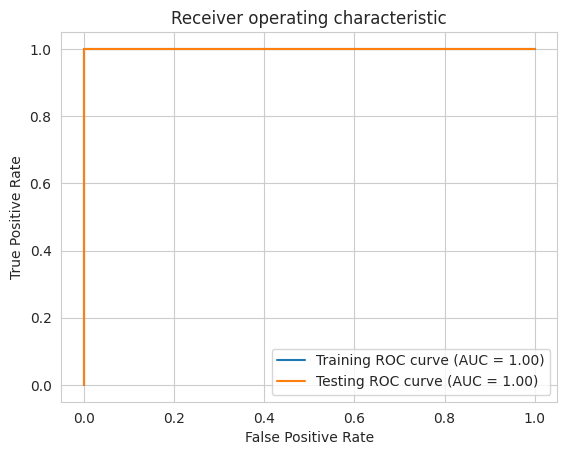

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resample, best_dt_clf.predict_proba(X_train_resample)[:, 1])
auc_train = roc_auc_score(y_train_resample, best_dt_clf.predict_proba(X_train_resample)[:, 1])

# Calculate the false positive rate, true positive rate, and thresholds for the testing data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1, best_dt_clf.predict_proba(X_test_1)[:, 1])
auc_test = roc_auc_score(y_test_1, best_dt_clf.predict_proba(X_test_1)[:, 1])

# Plot the ROC curve and AUC score for the training data
plt.plot(fpr_train, tpr_train, label='Training ROC curve (AUC = %0.2f)' % auc_train)

# Plot the ROC curve and AUC score for the testing data
plt.plot(fpr_test, tpr_test, label='Testing ROC curve (AUC = %0.2f)' % auc_test)

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# kmeansSMOTE

# Define the hyperparameters to tune and their possible values
param_grid = { 'max_depth': [3, 4, 5],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

# Initialize a decision tree classifier
dt_clf_km = DecisionTreeClassifier()

# Perform hyperparameter tuning using GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(dt_clf_km, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_re, y_train_re)
end_time = time.time()

# Print the best hyperparameters and their accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
print("Runtime: ", end_time - start_time, "seconds")

# Use the best hyperparameters to train a new decision tree classifier
best_dt_clf = DecisionTreeClassifier(**grid_search.best_params_)

start_time = time.time()
best_dt_clf.fit(X_train_re, y_train_re)
end_time = time.time()

# Use the trained model to make predictions on the testing data
start_time = time.time()
y_pred_dt = best_dt_clf.predict(X_test_1)
end_time = time.time()

# Evaluate the performance of the random forest classifier
print("Accuracy:", accuracy_score(y_test_1, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test_1, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred_dt))
print("Runtime: \n", end_time - start_time, "seconds")

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score:  1.0
Runtime:  0.7510128021240234 seconds
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[112   0]
 [  0  28]]
Runtime: 
 0.0015680789947509766 seconds


AUC and ROC curve plot

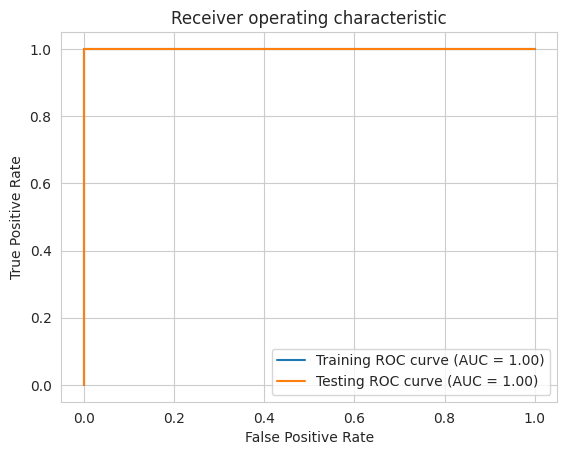

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_re, best_dt_clf.predict_proba(X_train_re)[:, 1])
auc_train = roc_auc_score(y_train_re, best_dt_clf.predict_proba(X_train_re)[:, 1])

# Calculate the false positive rate, true positive rate, and thresholds for the testing data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1, best_dt_clf.predict_proba(X_test_1)[:, 1])
auc_test = roc_auc_score(y_test_1, best_dt_clf.predict_proba(X_test_1)[:, 1])

# Plot the ROC curve and AUC score for the training data
plt.plot(fpr_train, tpr_train, label='Training ROC curve (AUC = %0.2f)' % auc_train)

# Plot the ROC curve and AUC score for the testing data
plt.plot(fpr_test, tpr_test, label='Testing ROC curve (AUC = %0.2f)' % auc_test)

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Compare accuracy of the training model, for SMOTE and KMeans SMOTE data, using Naive Bayes Classifier

Accuracy: 0.34285714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.21      0.33       112
           1       0.22      0.89      0.35        28

    accuracy                           0.34       140
   macro avg       0.55      0.55      0.34       140
weighted avg       0.75      0.34      0.34       140

Confusion Matrix:
[[23 89]
 [ 3 25]]


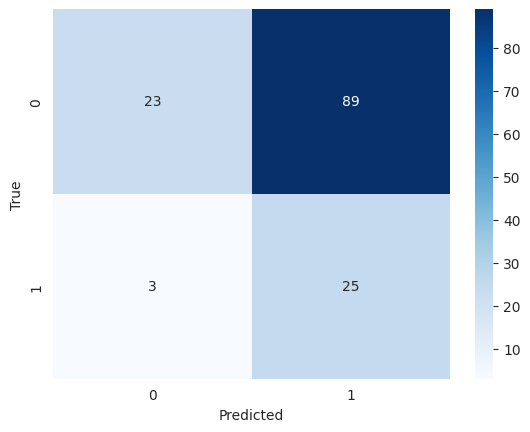

In [ ]:
# SMOTE
# Initialize Decision Tree classifier
G_nb_sm = GaussianNB(var_smoothing=1e-2)

# Train the classifier on the training data
G_nb_sm.fit(X_train_resample, y_train_resample)

# Predict the target variable for the testing data
y_pred = G_nb_sm.predict(X_test_1)

# Evaluate the performance of the classifier


print("Accuracy:", accuracy_score(y_test_1, y_pred))
print("Classification Report:")
print(classification_report(y_test_1, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred))

# Assuming y_true and y_pred are the true and predicted values, respectively
cm = confusion_matrix(y_test_1, y_pred)

# Plot the confusion matrix as a heatmap

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


AUC and ROC curve plot

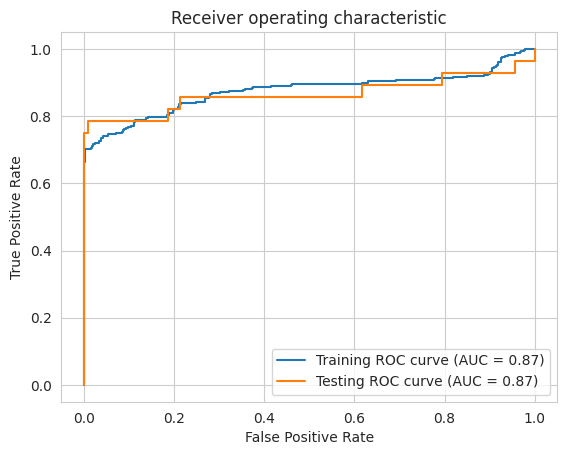

In [ ]:
# SMOTE
# Calculate the false positive rate, true positive rate, and thresholds for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resample, G_nb_sm.predict_proba(X_train_resample)[:, 1])
auc_train = roc_auc_score(y_train_resample, G_nb_sm.predict_proba(X_train_resample)[:, 1])

# Calculate the false positive rate, true positive rate, and thresholds for the testing data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1, G_nb_sm.predict_proba(X_test_1)[:, 1])
auc_test = roc_auc_score(y_test_1, G_nb_sm.predict_proba(X_test_1)[:, 1])

# Plot the ROC curve and AUC score for the training data
plt.plot(fpr_train, tpr_train, label='Training ROC curve (AUC = %0.2f)' % auc_train)

# Plot the ROC curve and AUC score for the testing data
plt.plot(fpr_test, tpr_test, label='Testing ROC curve (AUC = %0.2f)' % auc_test)

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.38571428571428573
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.27      0.41       112
           1       0.23      0.86      0.36        28

    accuracy                           0.39       140
   macro avg       0.55      0.56      0.38       140
weighted avg       0.75      0.39      0.40       140

Confusion Matrix:
[[30 82]
 [ 4 24]]


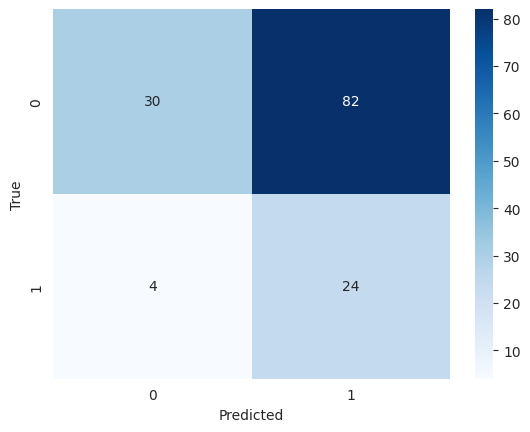

In [ ]:
# KMEANSSMOTE
# Initialize NaiveBayes classifier
G_nb_km = GaussianNB(var_smoothing=1e-2)

# Train the classifier on the training data
G_nb_km.fit(X_train_re, y_train_re)

# Predict the target variable for the testing data
y_pred_nb = G_nb_km.predict(X_test_1)

# Evaluate the performance of the classifier


print("Accuracy:", accuracy_score(y_test_1, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test_1, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred_nb))

# Assuming y_true and y_pred are the true and predicted values, respectively
cm = confusion_matrix(y_test_1, y_pred_nb)

# Plot the confusion matrix as a heatmap

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


AUC and ROC curve plot

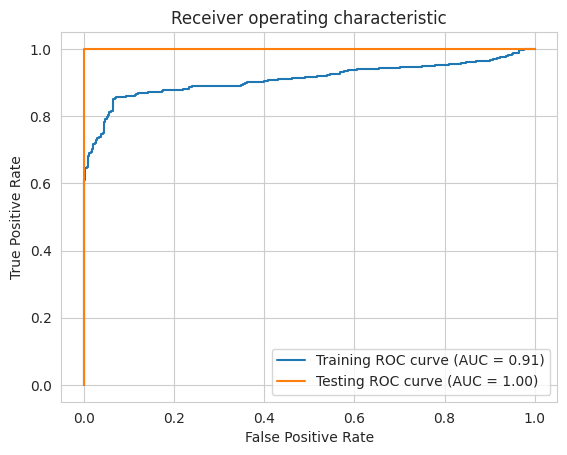

In [ ]:
# KMEANSSMOTE
# Calculate the false positive rate, true positive rate, and thresholds for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_re, G_nb_km.predict_proba(X_train_re)[:, 1])
auc_train = roc_auc_score(y_train_re, G_nb_km.predict_proba(X_train_re)[:, 1])

# Calculate the false positive rate, true positive rate, and thresholds for the testing data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1, best_dt_clf.predict_proba(X_test_1)[:, 1])
auc_test = roc_auc_score(y_test_1, best_dt_clf.predict_proba(X_test_1)[:, 1])

# Plot the ROC curve and AUC score for the training data
plt.plot(fpr_train, tpr_train, label='Training ROC curve (AUC = %0.2f)' % auc_train)

# Plot the ROC curve and AUC score for the testing data
plt.plot(fpr_test, tpr_test, label='Testing ROC curve (AUC = %0.2f)' % auc_test)

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Compare accuracy of the training model, for SMOTE and KMeans SMOTE data, using K Neighbor Classifier

Accuracy: 0.7571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       112
           1       0.44      0.82      0.57        28

    accuracy                           0.76       140
   macro avg       0.69      0.78      0.70       140
weighted avg       0.84      0.76      0.78       140

Confusion Matrix:
[[83 29]
 [ 5 23]]


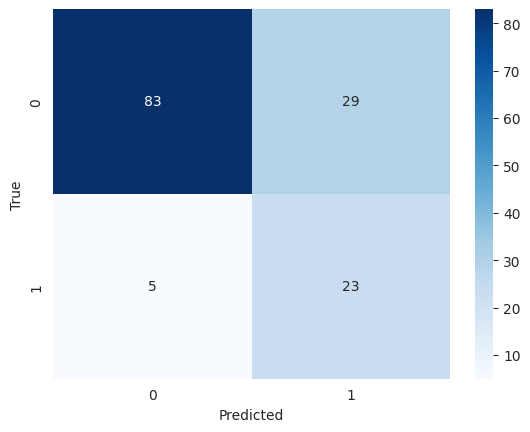

In [ ]:
# SMOTE
# Initialize K Neighbor classifier
K_cla_sm = KNeighborsClassifier()

# Train the classifier on the training data
K_cla_sm.fit(X_train_resample, y_train_resample)

# Predict the target variable for the testing data
y_pred_k = K_cla_sm.predict(X_test_1)

# Evaluate the performance of the classifier


print("Accuracy:", accuracy_score(y_test_1, y_pred_k))
print("Classification Report:")
print(classification_report(y_test_1, y_pred_k))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred_k))

# Assuming y_true and y_pred are the true and predicted values, respectively
cm = confusion_matrix(y_test_1, y_pred_k)

# Plot the confusion matrix as a heatmap

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


AUC and ROC curve plot

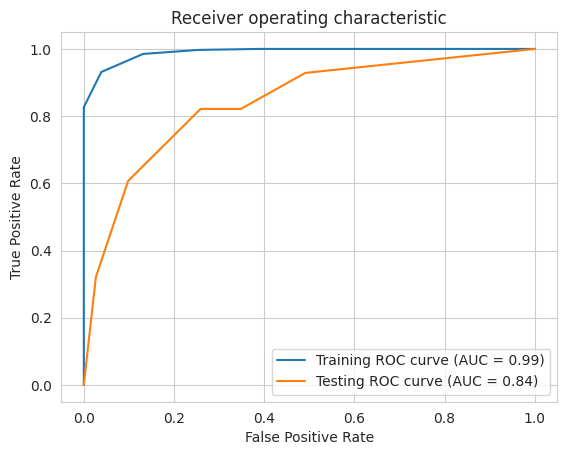

In [ ]:
# SMOTE
# Calculate the false positive rate, true positive rate, and thresholds for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resample, K_cla_sm.predict_proba(X_train_resample)[:, 1])
auc_train = roc_auc_score(y_train_resample, K_cla_sm.predict_proba(X_train_resample)[:, 1])

# Calculate the false positive rate, true positive rate, and thresholds for the testing data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1, K_cla_sm.predict_proba(X_test_1)[:, 1])
auc_test = roc_auc_score(y_test_1, K_cla_sm.predict_proba(X_test_1)[:, 1])

# Plot the ROC curve and AUC score for the training data
plt.plot(fpr_train, tpr_train, label='Training ROC curve (AUC = %0.2f)' % auc_train)

# Plot the ROC curve and AUC score for the testing data
plt.plot(fpr_test, tpr_test, label='Testing ROC curve (AUC = %0.2f)' % auc_test)

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8214285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       112
           1       0.56      0.50      0.53        28

    accuracy                           0.82       140
   macro avg       0.72      0.70      0.71       140
weighted avg       0.81      0.82      0.82       140

Confusion Matrix:
[[101  11]
 [ 14  14]]


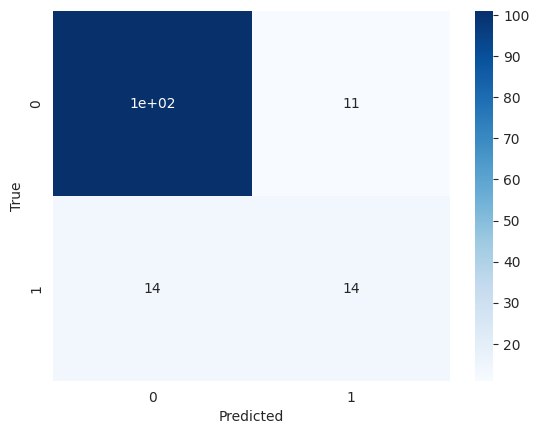

In [ ]:
# KMEANSSMOTE
# Initialize K Neighbor classifier
K_cla_km = KNeighborsClassifier()

# Train the classifier on the training data
K_cla_km.fit(X_train_re, y_train_re)

# Predict the target variable for the testing data
y_pred_km = K_cla_km.predict(X_test_1)

# Evaluate the performance of the classifier


print("Accuracy:", accuracy_score(y_test_1, y_pred_km))
print("Classification Report:")
print(classification_report(y_test_1, y_pred_km))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred_km))

# Assuming y_true and y_pred are the true and predicted values, respectively
cm = confusion_matrix(y_test_1, y_pred_km)

# Plot the confusion matrix as a heatmap

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


AUC and ROC curve plot

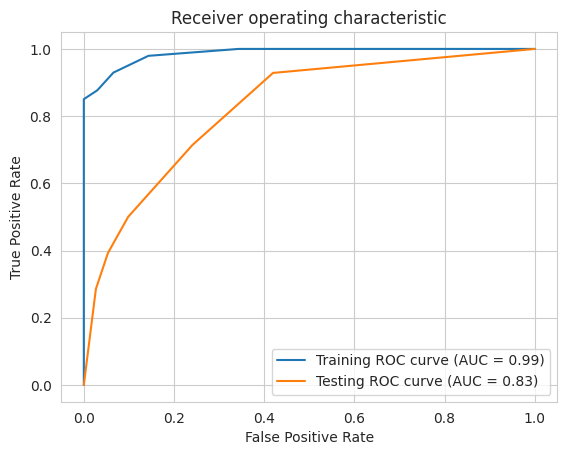

In [ ]:
# KMEANSSMOTE
# Calculate the false positive rate, true positive rate, and thresholds for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_re, K_cla_km.predict_proba(X_train_re)[:, 1])
auc_train = roc_auc_score(y_train_re, K_cla_km.predict_proba(X_train_re)[:, 1])

# Calculate the false positive rate, true positive rate, and thresholds for the testing data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1, K_cla_km.predict_proba(X_test_1)[:, 1])
auc_test = roc_auc_score(y_test_1, K_cla_km.predict_proba(X_test_1)[:, 1])

# Plot the ROC curve and AUC score for the training data
plt.plot(fpr_train, tpr_train, label='Training ROC curve (AUC = %0.2f)' % auc_train)

# Plot the ROC curve and AUC score for the testing data
plt.plot(fpr_test, tpr_test, label='Testing ROC curve (AUC = %0.2f)' % auc_test)

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Compare accuracy of the training model, for SMOTE and KMeans SMOTE data, using K Neighbor Classifier

Accuracy: 0.9928571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       112
           1       1.00      0.96      0.98        28

    accuracy                           0.99       140
   macro avg       1.00      0.98      0.99       140
weighted avg       0.99      0.99      0.99       140

Confusion Matrix:
[[112   0]
 [  1  27]]


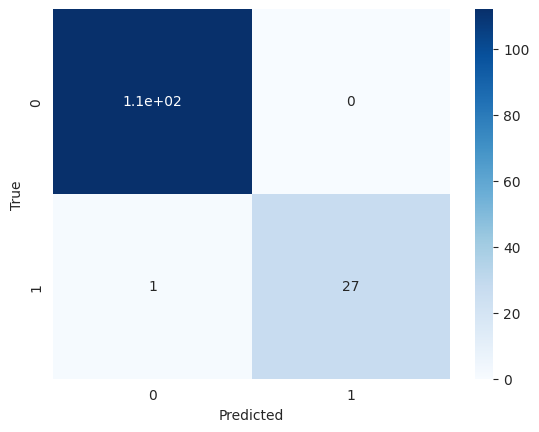

In [ ]:
svc_sm = SVC(C=2, kernel='linear', probability = True, random_state= 42)

# Train the classifier on the training data
svc_sm.fit(X_train_resample, y_train_resample)

# Predict the target variable for the testing data
y_pred = svc_sm.predict(X_test_1)

# Evaluate the performance of the classifier


print("Accuracy:", accuracy_score(y_test_1, y_pred))
print("Classification Report:")
print(classification_report(y_test_1, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred))

# Assuming y_true and y_pred are the true and predicted values, respectively
cm = confusion_matrix(y_test_1, y_pred)

# Plot the confusion matrix as a heatmap

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



AUC and ROC curve plot

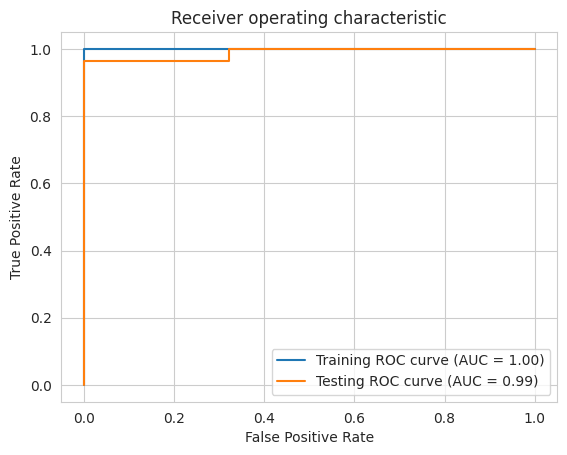

In [ ]:
# SMOTE
# Calculate the false positive rate, true positive rate, and thresholds for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resample, svc_sm.predict_proba(X_train_resample)[:, 1])
auc_train = roc_auc_score(y_train_resample, svc_sm.predict_proba(X_train_resample)[:, 1])

# Calculate the false positive rate, true positive rate, and thresholds for the testing data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1, svc_sm.predict_proba(X_test_1)[:, 1])
auc_test = roc_auc_score(y_test_1, svc_sm.predict_proba(X_test_1)[:, 1])

# Plot the ROC curve and AUC score for the training data
plt.plot(fpr_train, tpr_train, label='Training ROC curve (AUC = %0.2f)' % auc_train)

# Plot the ROC curve and AUC score for the testing data
plt.plot(fpr_test, tpr_test, label='Testing ROC curve (AUC = %0.2f)' % auc_test)

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# SMOTE
# Define the parameter grid for grid search
param_grid = {'svc__C': np.logspace(-3, 3, 7),'svc__gamma': np.logspace(-3, 3, 7),'svc__kernel': ['linear', 'rbf']}

# Create a pipeline with StandardScaler and SVC
pipe_sm = make_pipeline(StandardScaler(), SVC(C=2, kernel='linear', probability = True, random_state= 42))

# Perform grid search to find the best hyperparameters
start_time = time.time()
grid_search = GridSearchCV(pipe_sm, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resample, y_train_resample)
end_time = time.time()

# Print the best hyperparameters and the runtime
print("Best parameters:", grid_search.best_params_)
print("Runtime:", end_time - start_time)

# Predict the target variable for the testing data
y_pred = grid_search.predict(sc_test_data1)

# Evaluate the performance of the classifier


print("Accuracy:", accuracy_score(y_test_1, y_pred))
print("Classification Report:")
print(classification_report(y_test_1, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred))

Fitting 5 folds for each of 98 candidates, totalling 490 fits
Best parameters: {'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}
Runtime: 36.607324838638306
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[112   0]
 [  0  28]]


AUC and ROC curve plot

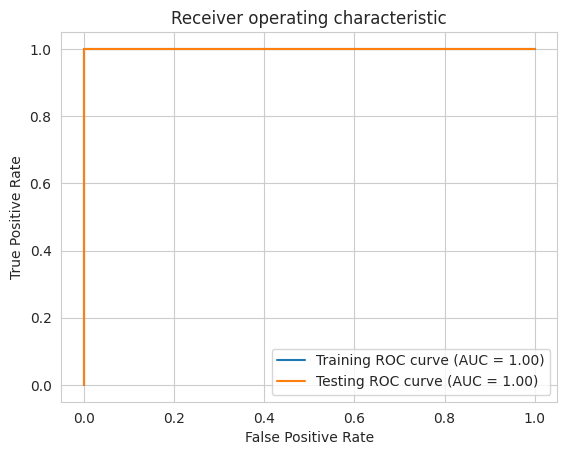

In [ ]:
# SMOTE
# Calculate the false positive rate, true positive rate, and thresholds for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resample, grid_search.predict_proba(X_train_resample)[:, 1])
auc_train = roc_auc_score(y_train_resample, grid_search.predict_proba(X_train_resample)[:, 1])

# Calculate the false positive rate, true positive rate, and thresholds for the testing data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1, grid_search.predict_proba(X_test_1)[:, 1])
auc_test = roc_auc_score(y_test_1, grid_search.predict_proba(X_test_1)[:, 1])

# Plot the ROC curve and AUC score for the training data
plt.plot(fpr_train, tpr_train, label='Training ROC curve (AUC = %0.2f)' % auc_train)

# Plot the ROC curve and AUC score for the testing data
plt.plot(fpr_test, tpr_test, label='Testing ROC curve (AUC = %0.2f)' % auc_test)

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# KMEANSSMOTE
# Define the parameter grid for grid search
param_grid = {'svc__C': np.logspace(-3, 3, 7),'svc__gamma': np.logspace(-3, 3, 7),'svc__kernel': ['linear', 'rbf']}

# Create a pipeline with StandardScaler and SVC
pipe_km = make_pipeline(StandardScaler(), SVC(C=2, kernel='linear', probability = True, random_state= 42))

# Perform grid search to find the best hyperparameters
start_time = time.time()
grid_search = GridSearchCV(pipe_km, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_re, y_train_re)
end_time = time.time()

# Print the best hyperparameters and the runtime
print("Best parameters:", grid_search.best_params_)
print("Runtime:", end_time - start_time)

# Predict the target variable for the testing data
y_pred = grid_search.predict(sc_test_data1)

# Evaluate the performance of the classifier


print("Accuracy:", accuracy_score(y_test_1, y_pred))
print("Classification Report:")
print(classification_report(y_test_1, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred))

Fitting 5 folds for each of 98 candidates, totalling 490 fits
Best parameters: {'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}
Runtime: 35.27061128616333
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[112   0]
 [  0  28]]


DETERMINE THE EFFECT OF THE TRAIN AND TEST SPLITS ON MODEL ACCURACY

COMPARE TRAIN_TEST SPLITS ON THE MODEL (DECISION TREE CLASSIFIER), 

TO OBSERVE CHANGES IN THE ACCURACY OF THE MODEL, IF ANY.

In [ ]:
# 70:30
sc = MinMaxScaler()
sc.fit(X_train_2)

sc_train_data= sc.transform(X_train_2)
sc_test_data = sc.transform(X_test_2)

print(sc_train_data.shape)

(391, 138)


In [ ]:
# Class Balancing using SMOTE
sm = SMOTE(random_state = 42)

X_train_resample_2, y_train_resample_2 = sm.fit_resample(X_train_2, y_train_2)

print("Number of variable instances in X_train_resampled ::",  X_train_resample_2.shape)
print("Number of variable instances in y_train_resampled ::",  y_train_resample_2.shape)


Number of variable instances in X_train_resampled :: (626, 138)
Number of variable instances in y_train_resampled :: (626,)


In [ ]:
# SMOTE

# Define the hyperparameters to tune and their possible values
param_grid = { 'max_depth': [3, 4, 5],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

# Initialize a decision tree classifier
dt_clf_sm_2 = DecisionTreeClassifier()

# Perform hyperparameter tuning using GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(dt_clf_sm_2, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resample_2, y_train_resample_2)
end_time = time.time()

# Print the best hyperparameters and their accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
print("Runtime: ", end_time - start_time, "seconds")

# Use the best hyperparameters to train a new decision tree classifier
best_dt_clf_2 = DecisionTreeClassifier(**grid_search.best_params_)

start_time = time.time()
best_dt_clf_2.fit(X_train_resample_2, y_train_resample_2)
end_time = time.time()

# Use the trained model to make predictions on the testing data
start_time = time.time()
y_pred = best_dt_clf_2.predict(X_test_1)
end_time = time.time()

# Evaluate the performance of the random forest classifier
print("Accuracy:", accuracy_score(y_test_1, y_pred))
print("Classification Report:")
print(classification_report(y_test_1, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred))
print("Runtime: \n", end_time - start_time, "seconds")

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score:  1.0
Runtime:  0.7628090381622314 seconds
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[112   0]
 [  0  28]]
Runtime: 
 0.0017139911651611328 seconds


In [ ]:
# 60:40
sc = MinMaxScaler()
sc.fit(X_train_3)

sc_train_data= sc.transform(X_train_3)
sc_test_data = sc.transform(X_test_3)

print(sc_train_data.shape)

(335, 138)


In [ ]:
# Class Balancing using SMOTE
sm = SMOTE(random_state = 42)

X_train_resample_3, y_train_resample_3 = sm.fit_resample(X_train_3, y_train_3)

print("Number of variable instances in X_train_resampled ::",  X_train_resample_3.shape)
print("Number of variable instances in y_train_resampled ::",  y_train_resample_3.shape)


Number of variable instances in X_train_resampled :: (536, 138)
Number of variable instances in y_train_resampled :: (536,)


In [ ]:
# SMOTE

# Define the hyperparameters to tune and their possible values
param_grid = { 'max_depth': [3, 4, 5],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

# Initialize a decision tree classifier
dt_clf_sm_3 = DecisionTreeClassifier()

# Perform hyperparameter tuning using GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(dt_clf_sm_3, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resample_3, y_train_resample_3)
end_time = time.time()

# Print the best hyperparameters and their accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
print("Runtime: ", end_time - start_time, "seconds")

# Use the best hyperparameters to train a new decision tree classifier
best_dt_clf_3 = DecisionTreeClassifier(**grid_search.best_params_)

start_time = time.time()
best_dt_clf_3.fit(X_train_resample_3, y_train_resample_3)
end_time = time.time()

# Use the trained model to make predictions on the testing data
start_time = time.time()
y_pred = best_dt_clf_3.predict(X_test_1)
end_time = time.time()

# Evaluate the performance of the random forest classifier
print("Accuracy:", accuracy_score(y_test_1, y_pred))
print("Classification Report:")
print(classification_report(y_test_1, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred))
print("Runtime: \n", end_time - start_time, "seconds")

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score:  1.0
Runtime:  0.7015955448150635 seconds
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[112   0]
 [  0  28]]
Runtime: 
 0.0014805793762207031 seconds


In [ ]:
# 55:45
sc = MinMaxScaler()
sc.fit(X_train_4)

sc_train_data= sc.transform(X_train_4)
sc_test_data = sc.transform(X_test_4)

print(sc_train_data.shape)

(307, 138)


In [ ]:
# Class Balancing using SMOTE
sm = SMOTE(random_state = 42)

X_train_resample_4, y_train_resample_4 = sm.fit_resample(X_train_4, y_train_4)

print("Number of variable instances in X_train_resampled ::",  X_train_resample_4.shape)
print("Number of variable instances in y_train_resampled ::",  y_train_resample_4.shape)


Number of variable instances in X_train_resampled :: (490, 138)
Number of variable instances in y_train_resampled :: (490,)


In [ ]:
# SMOTE

# Define the hyperparameters to tune and their possible values
param_grid = { 'max_depth': [3, 4, 5],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

# Initialize a decision tree classifier
dt_clf_sm_4 = DecisionTreeClassifier()

# Perform hyperparameter tuning using GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(dt_clf_sm_4, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resample_4, y_train_resample_4)
end_time = time.time()

# Print the best hyperparameters and their accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
print("Runtime: ", end_time - start_time, "seconds")

# Use the best hyperparameters to train a new decision tree classifier
best_dt_clf_4 = DecisionTreeClassifier(**grid_search.best_params_)

start_time = time.time()
best_dt_clf_4.fit(X_train_resample_4, y_train_resample_4)
end_time = time.time()

# Use the trained model to make predictions on the testing data
start_time = time.time()
y_pred = best_dt_clf_4.predict(X_test_1)
end_time = time.time()

# Evaluate the performance of the random forest classifier
print("Accuracy:", accuracy_score(y_test_1, y_pred))
print("Classification Report:")
print(classification_report(y_test_1, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred))
print("Runtime: \n", end_time - start_time, "seconds")

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score:  1.0
Runtime:  0.6966962814331055 seconds
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[112   0]
 [  0  28]]
Runtime: 
 0.001453399658203125 seconds


CONCLUSION

The aim of this experiment was first to predict the default probability of a loan applicant, by comparing the accuracies of different models to determine the best model for the prediction.
The different classifiers used are XGBoost Classifier, RandomForest Classifier, DecisionTree Classifier, K-Nearest Neighbor, Gaussian Naive Bayes and Support Vector Classifier.


At first, we compared the effect of two class balancing techniques; SMOTE and KMeansSMOTE was compared for each of the classification model used in this experiment, to determine which technique would produce a better performance for the model selected.


Furthermore, different sizes of the Train-Test splits; 75:25, 70:30, 60:40 and 55:45 was used to train the model using the Decision Tree classification model to determine if the size of the train_test split has a direct impact on the model accuracy. 
From the experiment, it is observed that the train_test split ratio has no effects on the model accuracy.


In conclusion, the Decision Tree Classifier has been selected as a better model for this prediction owing to its processing speed, when compared to RandomForest and XGBoost models even though they returned an acuracy of 100%
